**PROJECT TEAM ID**: PTID-CDS-DEC-23-1712  
**PROJECT CODE**   : PM-PR-0012-ABC Tech   
**PROJECT NAME**   : ABC Tech | Category: ITSM - ML

# Bussiness Case

#### Introduction:
ABC Tech, a well-established mid-size organization operating in the IT-enabled business segment for over a decade, has successfully implemented ITIL (Information Technology Infrastructure Library) practices, including incident management, problem management, change management, and configuration management. However, recent challenges have arisen, primarily focusing on the need for improvement in incident management processes.

#### Current Scenario:
ABC Tech handles an average of 22-25k IT incidents/tickets annually, managed according to the best practices of the ITIL framework. Despite matured process levels, a recent audit has indicated that further improvement initiatives may not yield a sufficient return on investment. Customer survey results have indicated a poor rating for incident management.

#### Machine Learning as a Solution:
Inspired by insights gained from a Machine Learning conference focusing on Machine Learning for IT Service Management (ITSM), ABC Tech's management is considering the implementation of machine learning to address the challenges in their incident management processes.

# Domain Analysis

* **CI_Name :** Represents the unique name of the configuration item linked to the incident, providing context for incident analysis and resolution within ABC Tech's IT infrastructure.

* **CI_Cat:** Specifies the category of the configuration item, aiding in the classification of IT assets for effective incident prioritization and resolution.

* **CI_Subcat:** Indicates the subcategory of the configuration item, particularly for web-based applications, enhancing granularity in incident classification and handling.

* **WBS:** Captures the Work Breakdown Structure associated with the incident, offering insights into organizational structures and incident distribution across components.

* **Incident_ID:** A unique identifier for each incident, facilitating distinct identification and retrieval of incident records for comprehensive analysis.

* **Status:** Denotes the current status of the incident (e.g., Closed), tracking the incident lifecycle and resolution efficiency.

* **Impact, Urgency, Priority:** Quantifies the incident's impact, urgency, and priority, aiding in efficient resource allocation and resolution based on severity.

* **number_cnt:** Contains continuous numeric values, likely representing a count or measurement within a range between 0 and 1. Potentially used for tracking or referencing specific attributes in the IT service delivery system with a level of granularity

* **Category:** Specifies the category of the incident (e.g., hardware, software), enabling targeted analysis and resolution strategies for different types of incidents.

* **KB_number:** Refers to the Knowledge Base number associated with the incident, indicating the availability of documented resolutions in the knowledge base.

* **Alert_Status:** Represents the status of alerts associated with the incident, signaling critical issues and aiding in proactive problem resolution.

* **No_of_Reassignments:** Counts the number of times the incident has been reassigned, providing insights into initial assignment efficiency and recurring issues.

* **Open_Time, Reopen_Time, Resolved_Time, Close_Time:** Timestamps indicating when the incident was opened, reopened, resolved, and closed, aiding in resolution time analysis.

* **Handle_Time_hrs:** Represents the total handling time for the incident in hours, measuring the efficiency of incident handling processes.

* **Closure_Code:** Indicates the closure code associated with the incident, categorizing reasons for closure and contributing to trend analysis.

* **No_of_Related_Interactions, Related_Interaction:** Captures the number and details of related interactions, offering context for incident resolution.

* **No_of_Related_Incidents, No_of_Related_Changes, Related_Change:** Tracks the number of related incidents and changes, along with details about related changes, aiding in comprehensive incident and change impact analysis.

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
# timeseries libraries
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('dataset.csv')
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [3]:
df.Related_Change.value_counts().sum()

560

# Basic Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [5]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [6]:
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [7]:
#To know how many unique values are there in each column
for i in df:
    print(i   ,"----------",df[i].nunique())

CI_Name ---------- 3019
CI_Cat ---------- 12
CI_Subcat ---------- 64
WBS ---------- 274
Incident_ID ---------- 46606
Status ---------- 2
Impact ---------- 6
Urgency ---------- 11
Priority ---------- 5
number_cnt ---------- 46606
Category ---------- 4
KB_number ---------- 1825
Alert_Status ---------- 1
No_of_Reassignments ---------- 41
Open_Time ---------- 34636
Reopen_Time ---------- 2244
Resolved_Time ---------- 33627
Close_Time ---------- 34528
Handle_Time_hrs ---------- 30638
Closure_Code ---------- 14
No_of_Related_Interactions ---------- 49
Related_Interaction ---------- 43060
No_of_Related_Incidents ---------- 24
No_of_Related_Changes ---------- 4
Related_Change ---------- 232


In [8]:
# Checking for  null values
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [9]:
#In our initial dataset analysis, we discovered that the "Alert_status" column exclusively contains "Closed" values, rendering it non-informative. Similarly, the "Incident_ID" or "Related_Interaction" column serves as an identifier with all rows exhibiting unique values, making it redundant. Consequently, we have decided to eliminate these columns.
df.drop(['Alert_Status','Incident_ID','Related_Interaction'],axis=1,inplace=True)

In [10]:
# After identifying null values across all columns, it became evident that certain columns exhibited null values exceeding 90 percent. Given that these columns lack substantial information or utility due to the significant absence of data, we have made the decision to exclude/drop them from further analysis.
df.drop('Reopen_Time',axis=1,inplace=True)

In [11]:
#We are converting the data type of certain columns to the datetime format to enhance their significance in exploratory data analysis (EDA).
df.Open_Time=pd.to_datetime(df.Open_Time,dayfirst=True)
df.Resolved_Time=pd.to_datetime(df.Resolved_Time,dayfirst=True)
df.Close_Time=pd.to_datetime(df.Close_Time,dayfirst=True)

In [12]:
df['Open_Time']=pd.to_datetime(df['Open_Time'], dayfirst=True)
df['Close_Time']=pd.to_datetime(df['Close_Time'], dayfirst=True)

In [13]:
df['difference']=df['Close_Time']-df['Open_Time']

In [14]:
df['difference']

0       638 days 00:19:00
1       629 days 20:52:00
2       655 days 02:37:00
3       484 days 21:42:00
4       455 days 02:54:00
               ...       
46601     0 days 00:06:00
46602     0 days 00:26:00
46603     0 days 00:04:00
46604     0 days 00:07:00
46605     0 days 05:23:00
Name: difference, Length: 46606, dtype: timedelta64[ns]

In [15]:
df['difference'].max()

Timedelta('655 days 02:37:00')

In [16]:
df['difference'].min()

Timedelta('0 days 00:00:00')

In [17]:
df.difference.describe()

count                         46606
mean      5 days 03:07:58.623782345
std      18 days 20:47:39.550161405
min                 0 days 00:00:00
25%                 0 days 01:16:00
50%                 0 days 18:24:00
75%                 3 days 23:05:00
max               655 days 02:37:00
Name: difference, dtype: object

In [18]:
df['Close_Time']

0       2013-11-04 13:51:00
1       2013-12-02 12:36:00
2       2014-01-13 15:13:00
3       2013-11-14 09:31:00
4       2013-11-08 13:55:00
                ...        
46601   2014-03-31 16:29:00
46602   2014-03-31 15:29:00
46603   2014-03-31 15:32:00
46604   2014-03-31 15:42:00
46605   2014-03-31 22:47:00
Name: Close_Time, Length: 46606, dtype: datetime64[ns]

In [19]:
df['Open_Time']

0       2012-02-05 13:32:00
1       2012-03-12 15:44:00
2       2012-03-29 12:36:00
3       2012-07-17 11:49:00
4       2012-08-10 11:01:00
                ...        
46601   2014-03-31 16:23:00
46602   2014-03-31 15:03:00
46603   2014-03-31 15:28:00
46604   2014-03-31 15:35:00
46605   2014-03-31 17:24:00
Name: Open_Time, Length: 46606, dtype: datetime64[ns]

In [20]:
# Convert timedelta to hours in the existing 'difference' column
df['difference_hr'] = df['difference'].dt.total_seconds() / 3600

# Display the DataFrame with the 'difference' column now representing the time difference in hours
print(df[['difference_hr']])

       difference_hr
0       15312.316667
1       15116.866667
2       15722.616667
3       11637.700000
4       10922.900000
...              ...
46601       0.100000
46602       0.433333
46603       0.066667
46604       0.116667
46605       5.383333

[46606 rows x 1 columns]


## Exploratory Data Analyis
* Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset. Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data. Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline. By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

### Univariate Analysis
* Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset. Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

**Histogram:**

* Description: A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.  
* Components:
    - Vertical bars represent the frequency or count of observations within each bin.
    - Bins categorize data points based on their values.
    - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

**Countplot:**  

* Description: A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
* Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

In [21]:
df1=df[['CI_Cat','Status', 'Impact', 'Urgency','Priority','Category','Closure_Code','No_of_Related_Changes','No_of_Related_Incidents','No_of_Reassignments','No_of_Related_Interactions']]

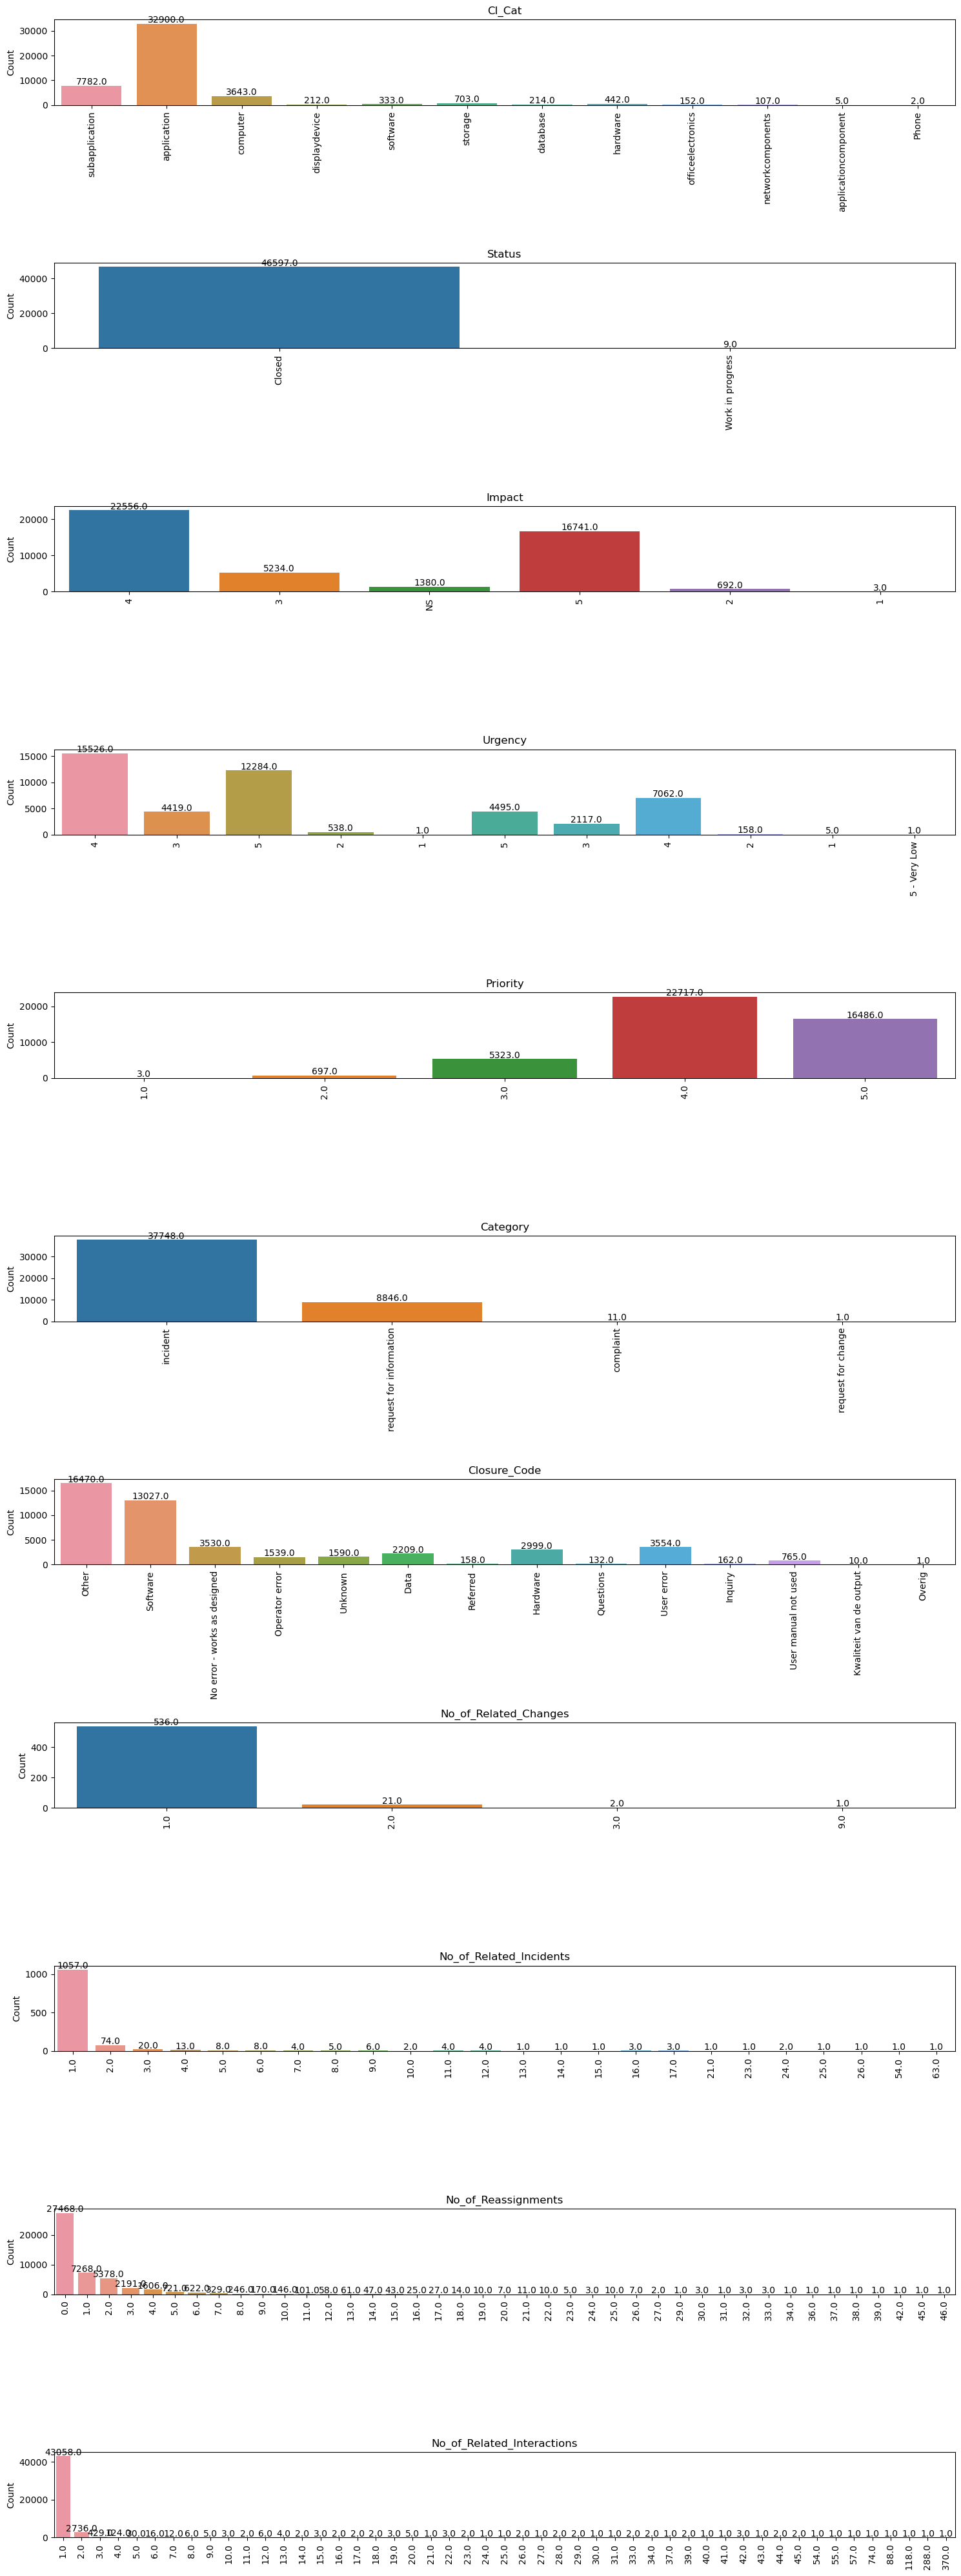

In [22]:
plt.figure(figsize=(15,40))
plotnumber=1
for i in df1:
    ax=plt.subplot(11,1,plotnumber)
    sns.countplot(x=df1[i])
    plotnumber=plotnumber+1
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

    plt.xlabel('')  
    plt.ylabel('Count')  
    plt.title(i, loc='center')  
    plt.xticks(rotation=90)
    

plt.tight_layout()

#### Insights:
* Upon visualizing count plots for the categorical columns, a discernible trend emerged where specific categories overwhelmingly dominated in the majority of the plots. These dominant categories significantly overshadowed the presence of other categories.  
* In the count plot for the 'CI_cat' column, it is evident that the categories 'application,' 'subapplication,' and 'computer' collectively constitute more than 90 percent of occurrences, significantly surpassing the prevalence of all other categories.  
* Upon examining the 'status' column, it becomes apparent that the 'closed' status overwhelmingly represents more than 99 percent of the entries. Given this substantial imbalance and the lack of diverse information, we have opted to remove/drop this column from further analysis.
* Upon reviewing the Impact, Urgency, and Priority columns, it is evident that over 95 percent of tickets exhibit lower impact, lower urgency, and lower priority. This is indicated by the prevalence of values 3, 4, and 5, collectively accounting for more than 95 percent of the dataset, highlighting a tendency towards lower levels of impact, urgency, and priority across the tickets.   
* Upon examining the Category column graph, it is evident that the categories 'incident' and 'request for information' overwhelmingly dominate the column. Together, these categories constitute approximately 99 percent of the values, highlighting their substantial prevalence within the dataset.  
* By analyzing the 'Closure_Code' column, it is apparent that the top three categories are 'Software,' accounting for 28 percent of the data values, followed by 'User error' and 'No error - works as designed' with 8 percent each. These categories emerge as the most prominent within the dataset. 
* Upon examination of the 'No_of_Related_Changes,' 'No_of_Related_Incidents,' 'No_of_Reassignments,' and 'No_of_Related_Interaction' columns, it is apparent that a consistent pattern exists across all four. More than 90 percent of the entries in each column indicate a dominance of having 1 related change, 1 related incident, 1 reassignment, and 1 related interaction, respectively. This suggests a prevalent association with singular instances across these columns in the dataset.  

In [23]:
df.drop('Status',axis=1,inplace=True)

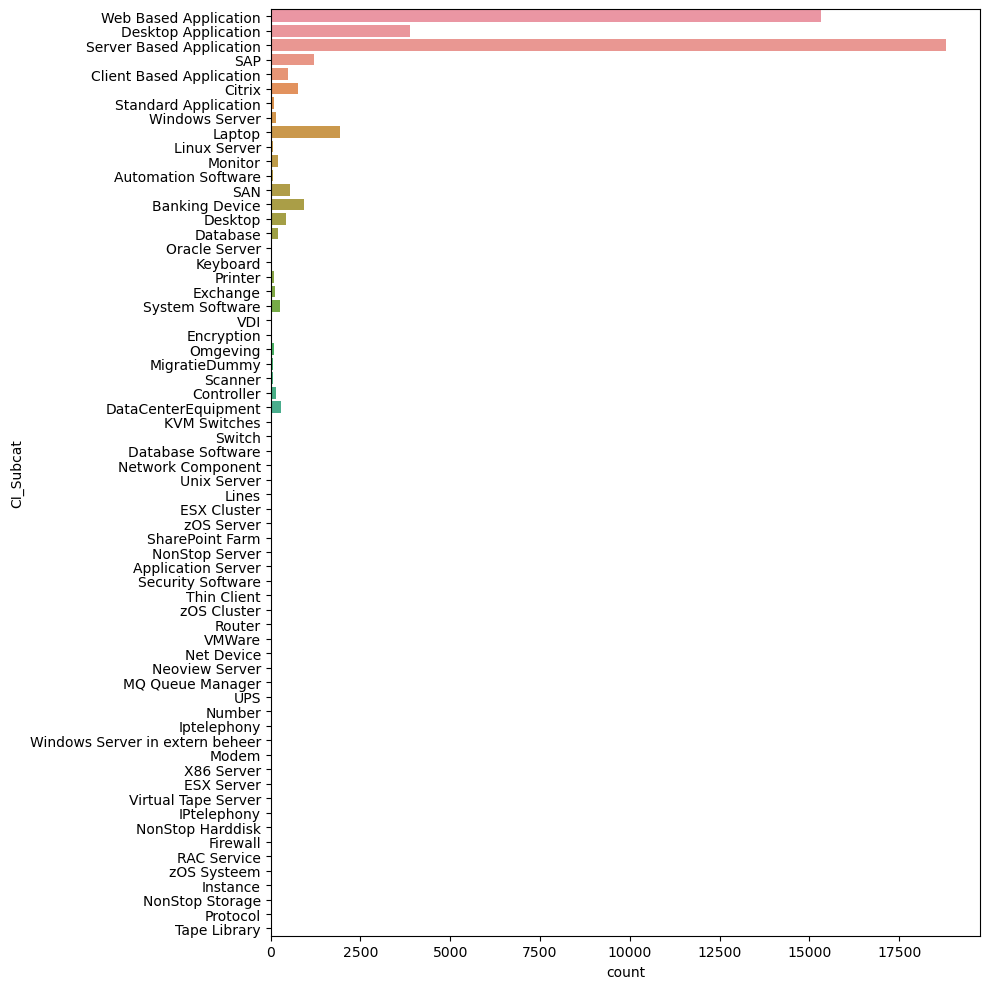

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(y=df.CI_Subcat)
plt.tight_layout()

#### Insights:
Upon examining the graph for 'CI_Subcat,' it is notable that among all the categories, only three categories - 'Server Based Application,' 'Web Based Application,' and 'Desktop Application' - collectively account for 82 percent of the data values. This indicates a substantial concentration of data within these specific categories.  

<Axes: xlabel='number_cnt', ylabel='Count'>

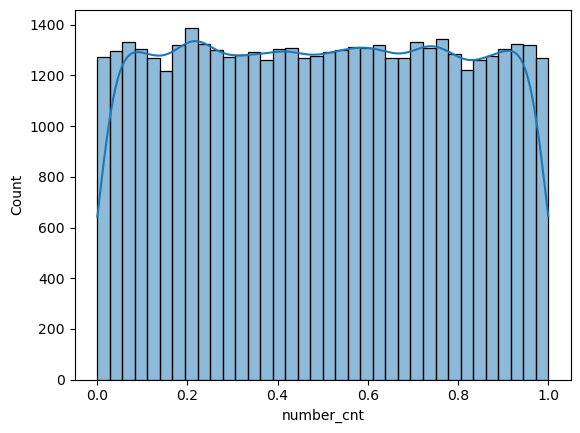

In [25]:
sns.histplot(df.number_cnt,kde=True)

#### Insights:
Upon plotting the "number_cnt" column, a distinct pattern emerges, revealing that each bin contains approximately an equal number of data points. This uniform distribution across the bins underscores the balanced representation of data, emphasizing the consistency in the distribution of values. This observation is crucial for understanding the dataset's overall structure and can provide valuable insights into the underlying patterns and trends within the data.  

### Bivariate Analysis
* Bivariate analysis involves the analysis of two variables to understand the relationships between them. It helps to explore the interactions and associations between pairs of variables. 


In each column, various categories exist, and obtaining insights differs after plotting each category. Following univariate analysis, it is evident that the top three categories in each column account for over 90% of the datapoints. Consequently, we have decided to focus on plotting only the top three categories for columns with a larger number of categories.

In [26]:
df.CI_Cat.value_counts().head(3)

CI_Cat
application       32900
subapplication     7782
computer           3643
Name: count, dtype: int64

<Axes: xlabel='CI_Cat', ylabel='count'>

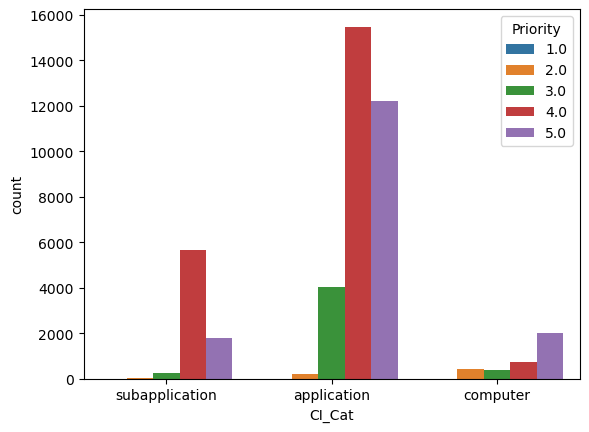

In [27]:
sns.countplot(x=df.loc[(df.CI_Cat=='application') | (df.CI_Cat=='subapplication')| (df.CI_Cat=='computer'),'CI_Cat'],hue=df.Priority)

**Insights:** After analyzing the graph, it is evident that within each category, priorities 4 and 5 dominate over other priority levels. Additionally, the probability of tickets belonging to priority level 2 is higher in the computer category compared to other categories.

<Axes: xlabel='Impact', ylabel='count'>

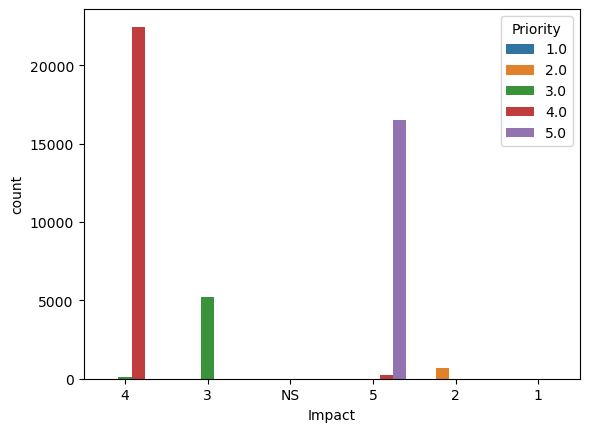

In [28]:
sns.countplot(x=df.Impact,hue=df.Priority)

**Insights:** After analyzing the graph depicting impact versus priority, a discernible pattern emerges, indicating a similarity between the two columns. It appears that tickets with the same priority level tend to cluster at corresponding impact levels, suggesting a correlation between impact and priority in the dataset.

<Axes: xlabel='Urgency', ylabel='count'>

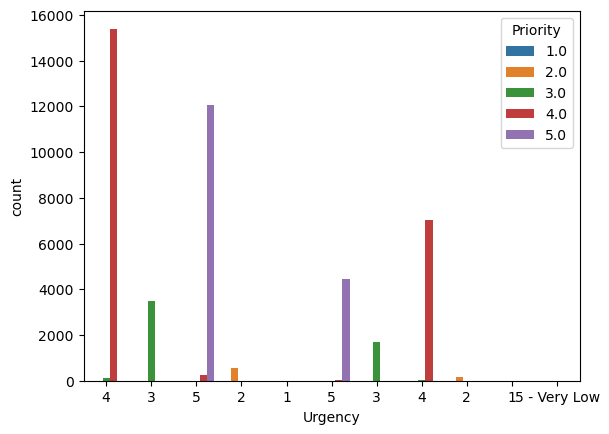

In [29]:
sns.countplot(x=df.Urgency,hue=df.Priority)

**Insights:** After analyzing the graph for priority versus urgency, a noticeable pattern becomes apparent, revealing a similar relationship between the two columns. It appears that tickets with the same priority level tend to exhibit corresponding urgency levels, suggesting a consistent correlation between priority and urgency in the dataset.

In [30]:
df.Category.value_counts().head(3)

Category
incident                   37748
request for information     8846
complaint                     11
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

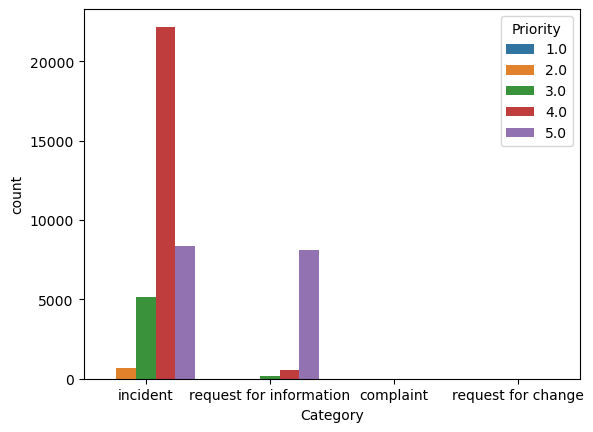

In [31]:
sns.countplot(x=df.Category, hue=df.Priority)

**Insights:** After analyzing the graph, it is clear that in each category, priorities 4 and 5 dominate over other priority levels, with most of the datapoints concentrated in these top two categories. Additionally, there is a higher probability of tickets belonging to priority level 2 in the incident category compared to other categories.

In [32]:
df.Closure_Code.value_counts().head(3)

Closure_Code
Other         16470
Software      13027
User error     3554
Name: count, dtype: int64

<Axes: xlabel='Closure_Code', ylabel='count'>

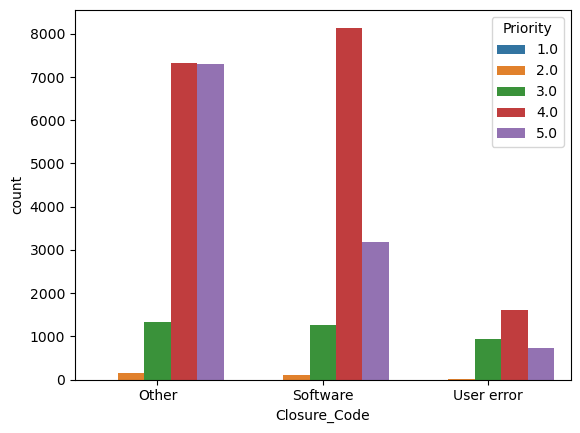

In [33]:
sns.countplot(x=df.loc[(df.Closure_Code=='Other') | (df.Closure_Code=='Software')| (df.Closure_Code=='User error'),'Closure_Code'],hue=df.Priority)

**Insights:** After analyzing the graph, it is evident that in each category, priorities 4 and 5 dominate over other priority levels. Additionally, the probability of tickets belonging to priority level 2 is higher in the software category compared to other categories.

In [34]:
df.No_of_Related_Changes.value_counts().head(3)

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
Name: count, dtype: int64

<Axes: xlabel='No_of_Related_Changes', ylabel='count'>

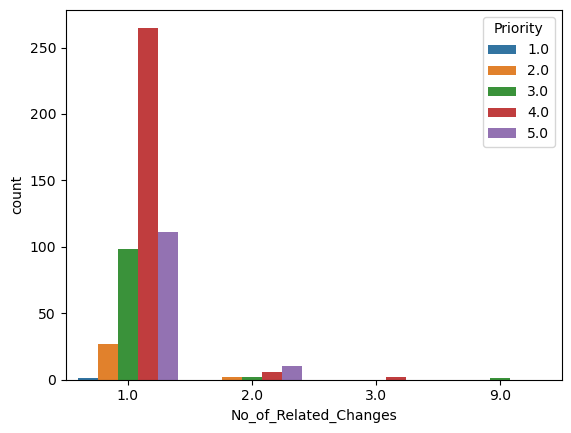

In [35]:
sns.countplot(x=df.No_of_Related_Changes, hue=df.Priority)

**Insights:** After visualizing the 'No_of_Related_Changes' column and conducting univariate analysis, it becomes apparent that instances with 1 change dominate the column. In comparison, priority level 4 tickets exhibit a higher frequency, and there is also notable prevalence in priority levels 5, 3, and 2 tickets within this column.

In [36]:
df.No_of_Related_Incidents.value_counts().head(3)

No_of_Related_Incidents
1.0    1057
2.0      74
3.0      20
Name: count, dtype: int64

<Axes: xlabel='No_of_Related_Incidents', ylabel='count'>

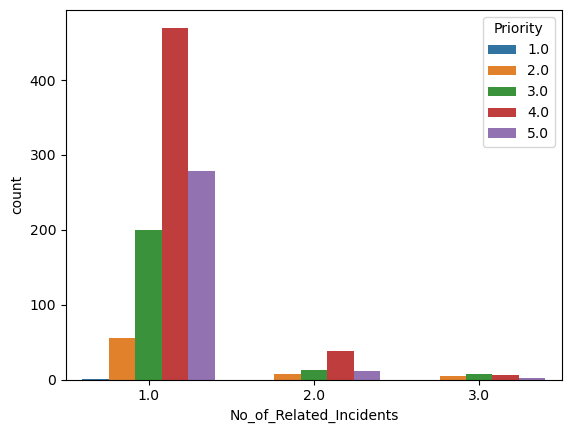

In [37]:
sns.countplot(x=df.loc[(df.No_of_Related_Incidents==1) | (df.No_of_Related_Incidents==2)| (df.No_of_Related_Incidents==3),'No_of_Related_Incidents'],hue=df.Priority)

**Insights:** After visualizing the 'No_of_Related_Incidents' column and conducting univariate analysis, it is evident that incidents with 1 related incident dominate this column. Moreover, when comparing this column with ticket priorities, there is a higher frequency of priority level 4 tickets, and priority levels 5, 3, and 2 tickets also show notable presence.

# Data Preprocessing

### 1. Handling with null values

In [38]:
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
No_of_Reassignments               1
Open_Time                         0
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
difference                        0
difference_hr                     0
dtype: int64

**Upon inspecting the null values in each column, it is observed that a significant portion of the columns are categorical, and some numerical columns exhibit behavior akin to categorical ones. Therefore, we have opted to replace the null values in these columns with the mode (most frequently occurring value) of each respective column to ensure comprehensive data imputation.**

In [39]:
df.CI_Cat.value_counts().head(5)

CI_Cat
application       32900
subapplication     7782
computer           3643
storage             703
hardware            442
Name: count, dtype: int64

In [40]:
df.loc[df.CI_Cat.isnull(),'CI_Cat']='application'

In [41]:
df.CI_Subcat.value_counts().head()

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
Name: count, dtype: int64

In [42]:
df.loc[df.CI_Subcat.isnull(),'CI_Subcat']='Server Based Application'

In [43]:
df.Priority.value_counts()

Priority
4.0    22717
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

In [44]:
df.loc[df.Priority.isnull(),'Priority']=4

In [45]:
df.No_of_Reassignments.value_counts().head()

No_of_Reassignments
0.0    27468
1.0     7268
2.0     5378
3.0     2191
4.0     1606
Name: count, dtype: int64

In [46]:
df.loc[df.No_of_Reassignments.isnull(),'No_of_Reassignments']=0

###### The 'Resolved_Time' column has instances of null values, being a date column. Consequently, we have determined to manage these null values when incorporating the column into the model creation process. Simultaneously, we are extending this approach to the 'Handle_time_hours' column, which is also a time-related column, ensuring a consistent strategy for handling null values across relevant temporal data features during the model creation phase.

##### After analyzing the business case, it appears that columns such as No_of_Related_Changes, No_of_Related_Incidents, and Related_Change would be valuable for model creation. Currently, we are not handling null values for these columns, but we plan to address them more effectively if necessary.

In [47]:
df.Closure_Code.isnull().sum()

460

In [48]:
df.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13027
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [49]:
df.loc[df.Closure_Code.isnull(),'Closure_Code']='Other'

In [50]:
df.No_of_Related_Interactions.value_counts().head()

No_of_Related_Interactions
1.0    43058
2.0     2736
3.0      429
4.0      124
5.0       30
Name: count, dtype: int64

In [51]:
df.loc[df.No_of_Related_Interactions.isnull(),'No_of_Related_Interactions']=1

### 2. Handling with Outliers

<Axes: >

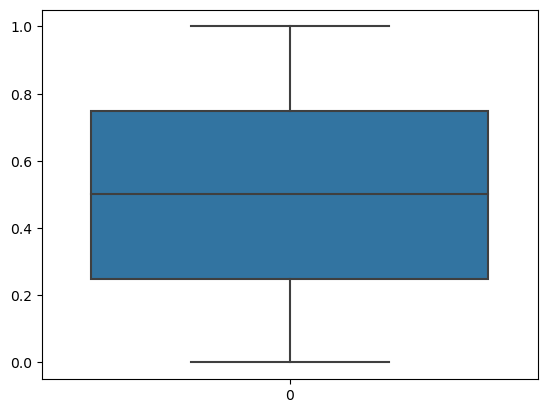

In [52]:
sns.boxplot(df.number_cnt)

##### Upon visualizing the boxplot for the "number_cnt" column, it is evident that there are no data points surpassing the upper and lower limits. The absence of any points beyond these limits indicates that there are no outliers in the dataset for this specific column. This observation suggests that the values within the "number_cnt" column fall within a reasonable range, without any extreme values that could be considered outliers based on the boxplot visualization.

### 3. Conversion of Categorical Data

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
df.CI_Cat=le.fit_transform(df.CI_Cat)

In [55]:
df.CI_Name=le.fit_transform(df.CI_Name)

In [56]:
df.CI_Subcat=le.fit_transform(df.CI_Subcat)

In [57]:
df.WBS=le.fit_transform(df.WBS)

In [58]:
df['Impact'] = df['Impact'].replace({'NS': '4'}).astype(int)

In [59]:
df['Urgency'] = df['Urgency'].replace({'5 - Very Low': '5'}).astype(int)

In [60]:
df.Category=le.fit_transform(df.Category)

In [61]:
df.KB_number=le.fit_transform(df.KB_number)

In [62]:
df.Closure_Code=le.fit_transform(df.Closure_Code)

In [63]:
df.Category=le.fit_transform(df.Category)

### SCALING

#### The dataset primarily comprises categorical columns, except for one that ranges from 0 to 1, making scaling unnecessary. This unique structure enables a focused approach to model training and evaluation, leveraging the inherent characteristics of the dataset.

# Feature Selection

In [64]:
df.corr(numeric_only=True)

,CI_Name,CI_Cat,CI_Subcat,WBS,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,difference_hr
CI_Name,1.000000,0.168450,0.955859,-0.106713,0.102733,0.120099,0.109747,-0.004393,0.072736,0.023000,0.033777,0.073642,-0.016371,0.008504,0.064024,0.047180
CI_Cat,0.168450,1.000000,0.199085,-0.217976,-0.053643,-0.048221,-0.051454,0.002004,-0.105516,-0.104256,-0.087445,-0.042221,-0.012490,-0.013770,0.028117,-0.027959
CI_Subcat,0.955859,0.199085,1.000000,-0.124059,0.073399,0.095688,0.082225,-0.004930,0.030193,0.007918,0.027461,0.104601,-0.013018,0.002737,0.070318,0.045755
WBS,-0.106713,-0.217976,-0.124059,1.000000,0.036470,0.023112,0.033027,0.007219,0.116663,0.025495,0.077974,-0.066865,-0.008254,0.028712,-0.048039,-0.003140
Impact,0.102733,-0.053643,0.073399,0.036470,1.000000,0.953839,0.991777,-0.000054,0.478724,0.081540,0.088287,-0.091811,-0.018950,-0.190194,-0.010650,0.038952
Urgency,0.120099,-0.048221,0.095688,0.023112,0.953839,1.000000,0.962714,0.000817,0.470580,0.077220,0.090753,-0.089882,-0.022843,-0.185858,-0.003766,0.038763
Priority,0.109747,-0.051454,0.082225,0.033027,0.991777,0.962714,1.000000,-0.000574,0.476719,0.078941,0.088205,-0.092107,-0.023669,-0.192372,-0.008950,0.038016
number_cnt,-0.004393,0.002004,-0.004930,0.007219,-0.000054,0.000817,-0.000574,1.000000,0.010799,-0.002186,-0.001697,-0.001899,0.000870,-0.036949,0.070318,0.000031
Category,0.072736,-0.105516,0.030193,0.116663,0.478724,0.470580,0.476719,0.010799,1.000000,-0.010460,0.077107,-0.144793,-0.008890,-0.035715,-0.014168,0.013208
KB_number,0.023000,-0.104256,0.007918,0.025495,0.081540,0.077220,0.078941,-0.002186,-0.010460,1.000000,-0.029637,0.023352,0.002790,-0.011489,-0.044804,-0.048578


<Axes: >

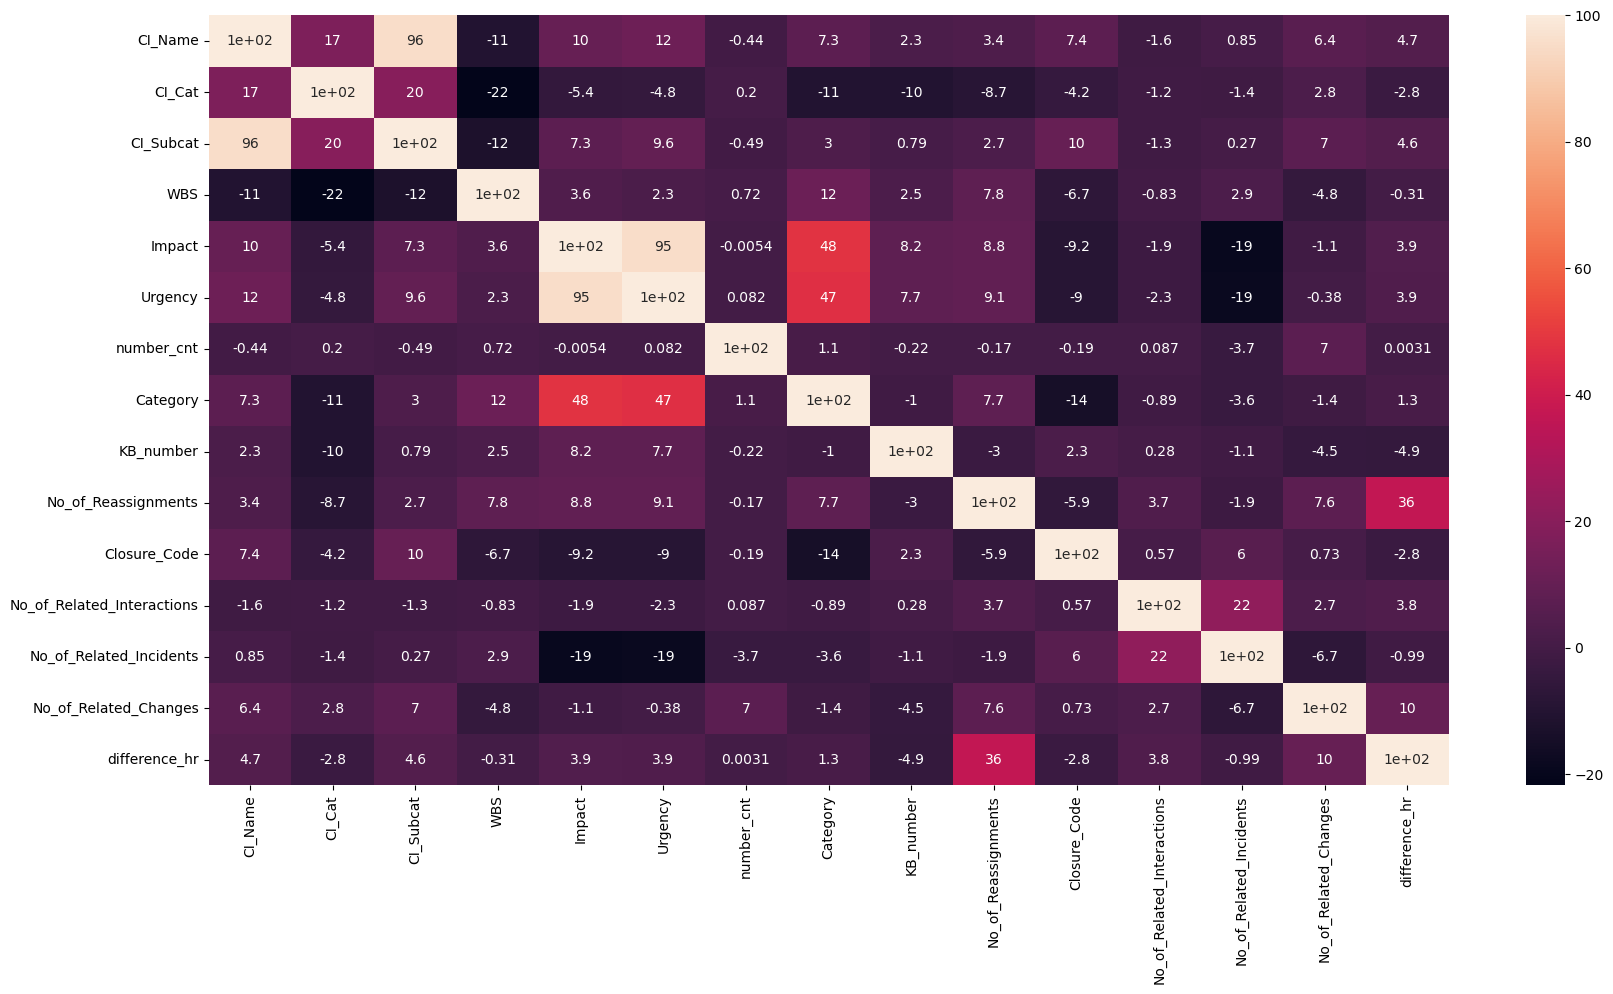

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop('Priority',axis=1).corr(numeric_only=True)*100,annot=True)

**Insights:** Upon examining the correlation between columns through heatmap visualization, it was evident that only the categorical columns, specifically "CI_Subcat" and "CI_Name," exhibited a substantial correlation of around 95%. Notably, this correlation was observed without making any alterations to the dataset.

# Problem 1:Predicting High Priority Tickets: To predict priority 1 & 2 tickets, sothat they can take preventive measures or fix the problem before it surfaces.

# Model Creation

**Following domain analysis, it was established that only the columns 'CI_Name,' 'CI_Cat,' 'CI_Subcat,' 'WBS,' 'Category,' and 'KB_number' are relevant for predicting the priority column. The remaining columns are filled subsequent to the priority column assignment, and notably, the 'Impact' and 'Urgency' columns are excluded due to their significant correlation with the priority column.**

In [66]:
x=df[['CI_Name','CI_Cat','CI_Subcat','WBS','Category','KB_number']]
y=df.Priority

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 6)
(34954,)
(11652, 6)
(11652,)


In [69]:
df.Priority.value_counts()

Priority
4.0    24097
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Categories')

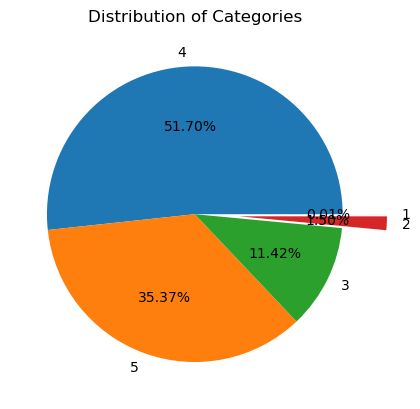

In [70]:
plt.pie(df['Priority'].value_counts(),labels=[4,5,3,2,1], autopct='%.2f%%',explode=[0, 0, 0, 0.3,0.3])
plt.title('Distribution of Categories')

 
**Upon examining data points within each category, it becomes evident that the output column exhibits imbalance. Consequently, a decision has been made to address this imbalance using the SMOTE (Synthetic Minority Over-sampling Technique) method.**

In [71]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [72]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [73]:
print(x_sm.shape)
print(y_sm.shape)

(90590, 6)
(90590,)


In [74]:
y_sm.value_counts()

Priority
4.0    18118
5.0    18118
3.0    18118
2.0    18118
1.0    18118
Name: count, dtype: int64

# Model Creation By Using Logistic_Regression

In [75]:
lr = LogisticRegression(multi_class='ovr')

In [76]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [77]:
y_pred_lr = lr.predict(x_test)

In [78]:
y_pred_lr_train = lr.predict(x_sm)

# Model Evaluation Logistic_Regression

In [79]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for test data : 0.5487469962238243
 accuracy_score for train data : 0.6344629650071751


In [80]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.6818259071032468


In [81]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.5487469962238243


In [82]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.08      0.69      0.15       162
         3.0       0.21      0.38      0.27      1356
         4.0       0.74      0.60      0.66      5979
         5.0       0.78      0.53      0.63      4154

    accuracy                           0.55     11652
   macro avg       0.36      0.44      0.34     11652
weighted avg       0.68      0.55      0.60     11652



In [83]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

         1.0       0.94      1.00      0.97     18118
         2.0       0.64      0.68      0.66     18118
         3.0       0.43      0.38      0.40     18118
         4.0       0.48      0.59      0.53     18118
         5.0       0.71      0.53      0.60     18118

    accuracy                           0.63     90590
   macro avg       0.64      0.63      0.63     90590
weighted avg       0.64      0.63      0.63     90590



## Model Creation by using KNN-Classifier

In [84]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[16.203226913834534, 16.220391349124615, 14.29797459663577, 13.053553038105045, 12.838997596979059, 13.027806385169926, 12.959148644009613, 13.311019567456231, 13.379677308616547, 13.285272914521112]


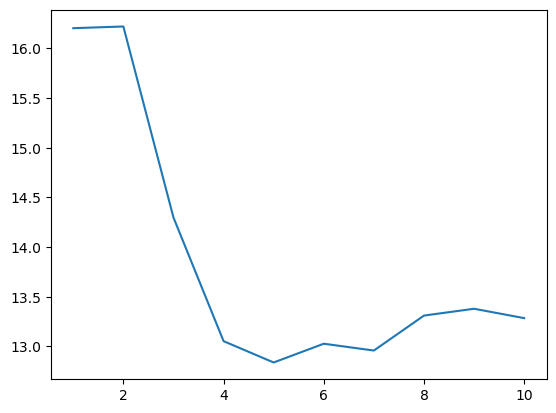

In [85]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.show()

In [86]:
knn = KNeighborsClassifier(5)

In [87]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [88]:
y_pred_knn = knn.predict(x_test)

In [89]:
y_pred_knn_train = knn.predict(x_sm)

## Model Evaluation KNN - Classifier

In [90]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

 accuracy_score for test data : 0.8716100240302094
 accuracy_score for train data : 0.8958825477425765


In [91]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.43      0.64      0.51       162
         3.0       0.64      0.72      0.68      1356
         4.0       0.91      0.89      0.90      5979
         5.0       0.94      0.91      0.92      4154

    accuracy                           0.87     11652
   macro avg       0.58      0.63      0.60     11652
weighted avg       0.88      0.87      0.87     11652

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     18118
         2.0       0.96      0.84      0.90     18118
         3.0       0.88      0.81      0.84     18118
         4.0       0.76      0.90      0.82     18118
         5.0       0.91      0.93      0.92     18118

    accuracy                           0.90     90590
   macro avg       0.90      0.90      0.90     90590


In [92]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.8795175168406071


In [93]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.8716100240302094


## Model creation by using SVM-Classifier

In [94]:
svc = SVC()

In [95]:
svc.fit(x_sm,y_sm)

SVC()

In [96]:
y_pred_svc = svc.predict(x_test)

In [97]:
y_pred_svc_train = svc.predict(x_sm)

## Model Evaluation SVM - Classifier

In [98]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

 accuracy_score for test data : 0.5090113285272915
 accuracy_score for train data : 0.620278176399161


In [99]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.660838336309016


In [100]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.5090113285272915


In [101]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.32      0.60      0.41       162
         3.0       0.20      0.55      0.29      1356
         4.0       0.78      0.53      0.63      5979
         5.0       0.66      0.46      0.54      4154

    accuracy                           0.51     11652
   macro avg       0.39      0.43      0.37     11652
weighted avg       0.66      0.51      0.56     11652

classification_report for train data :               precision    recall  f1-score   support

         1.0       0.81      1.00      0.89     18118
         2.0       0.87      0.59      0.70     18118
         3.0       0.43      0.54      0.48     18118
         4.0       0.56      0.53      0.54     18118
         5.0       0.51      0.45      0.47     18118

    accuracy                           0.62     90590
   macro avg       0.63      0.62      0.62     90590


##### Among all the models, SVM is consuming a significant amount of time, leading us to opt against conducting hyperparameter tuning for SVM.

## Model Creation By Using Decision Tree Classifier

In [102]:
dtc = DecisionTreeClassifier()

In [103]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [104]:
y_pred_dtc= dtc.predict(x_test)

In [105]:
y_pred_dtc_train=dtc.predict(x_sm)

## Model Evaluation Decision Tree

In [106]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.8595090971507038
 accuracy_score for train data : 0.9366155204768738


In [107]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.8888265092832902


In [108]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.8595090971507038


In [109]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.21      0.59      0.31       162
         3.0       0.61      0.80      0.69      1356
         4.0       0.93      0.85      0.89      5979
         5.0       0.95      0.91      0.93      4154

    accuracy                           0.86     11652
   macro avg       0.54      0.63      0.56     11652
weighted avg       0.89      0.86      0.87     11652

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     18118
         2.0       0.92      0.97      0.94     18118
         3.0       0.90      0.90      0.90     18118
         4.0       0.91      0.88      0.89     18118
         5.0       0.95      0.94      0.95     18118

    accuracy                           0.94     90590
   macro avg       0.94      0.94      0.94     90590


After reviewing the results obtained from the decision tree, it is evident that the model is exhibiting signs of overfitting. To create a more generalized model, we will undertake hyperparameter tuning for the decision tree algorithm.

## HyperParameter Tuning for Decision Tree

In [110]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [111]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_sm, y_sm)
best_params = grid_search.best_params_

In [112]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_sm, y_sm)
y_pred = best_dt_classifier.predict(x_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)


Test Accuracy for Decision Tree: 0.858908341915551


## Model creation by using Random Forest Classifier

In [114]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [115]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [116]:
y_pred_rfc=rfc.predict(x_test)

In [117]:
y_pred_rfc_train = rfc.predict(x_sm)

## Model Evaluation Random Forest Classifier

In [118]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.861311362856162
 accuracy_score for train data : 0.9366044817308754


## Model Evaluation Report 


In [119]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.8883702600004707


In [120]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.861311362856162


In [121]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.22      0.59      0.32       162
         3.0       0.62      0.79      0.70      1356
         4.0       0.93      0.85      0.89      5979
         5.0       0.95      0.91      0.93      4154

    accuracy                           0.86     11652
   macro avg       0.54      0.63      0.57     11652
weighted avg       0.89      0.86      0.87     11652

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     18118
         2.0       0.92      0.97      0.94     18118
         3.0       0.91      0.90      0.90     18118
         4.0       0.91      0.88      0.89     18118
         5.0       0.95      0.94      0.95     18118

    accuracy                           0.94     90590
   macro avg       0.94      0.94      0.94     90590


**Following an evaluation of the outcomes achieved by the random forest, it has come to our attention that the model is displaying indications of overfitting. To enhance the model's generalization capabilities, we will proceed with hyperparameter tuning for the random forest algorithm.**

## HyperParameter Tuning for Random_Forest

In [122]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [123]:
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)
grid_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [124]:
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_sm, y_sm)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5, n_estimators=50)

In [125]:
y_pred_rfc = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Test Accuracy: 0.7857878475798146


In [126]:
df.Category.value_counts()

Category
1    37748
3     8846
0       11
2        1
Name: count, dtype: int64

# Conclusion

## Model Evaluation Report   
  
**LogisticRegression Model:**     
accuracy_score  : 0.5611053896326811    
precision_score : 0.7028669504086632   
recall_score f: 0.5611053896326811      
  
**K Nearest Neighbors Classifier Model:**   
accuracy_score : 0.8729831788534157   
precision_score : 0.8821216070424868    
recall_score : 0.8729831788534157     
  
**SVM Classifier Model:**         
accuracy_score : 0.5087538619979403     
precision_score : 0.6522565700827988      
recall_score : 0.5087538619979403        
  
**Decision Tree Classifier Model:**    
accuracy_score : 0.8545314109165808     
precision_score : 0.8885063096544685    
recall_score : 0.8545314109165808   
   
**Random Forest Classifier Model:**       
accuracy_score : 0.8554754548575352    
precision_score : 0.8870452989249499    
recall_score: 0.8554754548575352   


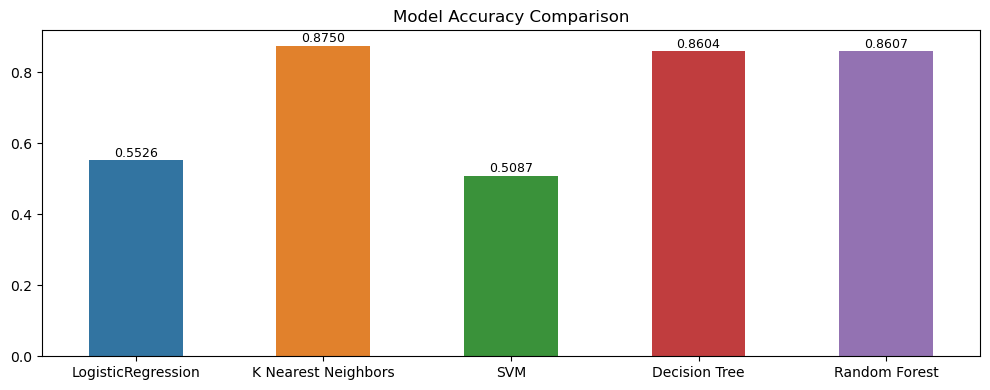

###### The K Nearest Neighbors Classifier outperforms other models in predicting high priority tickets, exhibiting high accuracy, precision, and recall. Logistic Regression and SVM Classifier models show lower performance, indicating the need for improvement. Decision Tree and Random Forest models perform competitively, offering viable options. The choice of the most suitable model should consider a balance between accuracy, precision, and recall, with further refinement recommended for practical applicability in addressing the priority ticket prediction problem.m

# Problem 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

In [127]:
# We have opted to use 2 columns for the purpose of forecasting.
data=pd.read_csv('dataset.csv')

In [128]:
data=data[['Incident_ID','Open_Time']]
data

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


In [129]:
# Convert the 'Open_Time' column to datetime format using the specified date and time format ("%d-%m-%Y %H:%M").
data.loc[:,'Open_Time']=pd.to_datetime(data.Open_Time,format="%d-%m-%Y %H:%M")

In [130]:
Open_Time=df.Open_Time

In [131]:
# Extracting date components (day, month, year) from the 'Open_Time' values and storing them in separate lists.
date=[]
day=[]
month=[]
year=[]
for x in Open_Time:
    date.append(x.date())
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)

In [132]:
data.loc[:,'date']=date
data.loc[:,'day']=day
data.loc[:,'month']=month
data.loc[:,'year']=year

In [133]:
data

,Incident_ID,Open_Time,date,day,month,year
0,IM0000004,2012-02-05 13:32:00,2012-02-05,5,2,2012
1,IM0000005,2012-03-12 15:44:00,2012-03-12,12,3,2012
2,IM0000006,2012-03-29 12:36:00,2012-03-29,29,3,2012
3,IM0000011,2012-07-17 11:49:00,2012-07-17,17,7,2012
4,IM0000012,2012-08-10 11:01:00,2012-08-10,10,8,2012
...,...,...,...,...,...,...
46601,IM0047053,2014-03-31 16:23:00,2014-03-31,31,3,2014
46602,IM0047054,2014-03-31 15:03:00,2014-03-31,31,3,2014
46603,IM0047055,2014-03-31 15:28:00,2014-03-31,31,3,2014
46604,IM0047056,2014-03-31 15:35:00,2014-03-31,31,3,2014


In [134]:
data.drop('Open_Time',axis=1,inplace=True)

In [135]:
final_df=data[['date','Incident_ID']]

In [136]:
final_df

,date,Incident_ID
0,2012-02-05,IM0000004
1,2012-03-12,IM0000005
2,2012-03-29,IM0000006
3,2012-07-17,IM0000011
4,2012-08-10,IM0000012
...,...,...
46601,2014-03-31,IM0047053
46602,2014-03-31,IM0047054
46603,2014-03-31,IM0047055
46604,2014-03-31,IM0047056


In [137]:
final_df.date=final_df.date.astype('datetime64[ns]')

In [138]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         46606 non-null  datetime64[ns]
 1   Incident_ID  46606 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 728.3+ KB


In [139]:
# Creating a pivot table on 'date' column to count the occurrences of 'Incident_ID' in the 'final_df' dataframe.
final_df=final_df.pivot_table(index='date',values='Incident_ID',aggfunc='count')

In [140]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2012-02-05 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Incident_ID  331 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [141]:
final_df.describe()

,Incident_ID
count,331.000000
mean,140.803625
std,174.781840
min,1.000000
25%,2.000000
50%,7.000000
75%,329.500000
max,569.000000


In [142]:
final_df

,Incident_ID
date,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2
...,...
2014-03-27,269
2014-03-28,205
2014-03-29,5


<Axes: xlabel='date'>

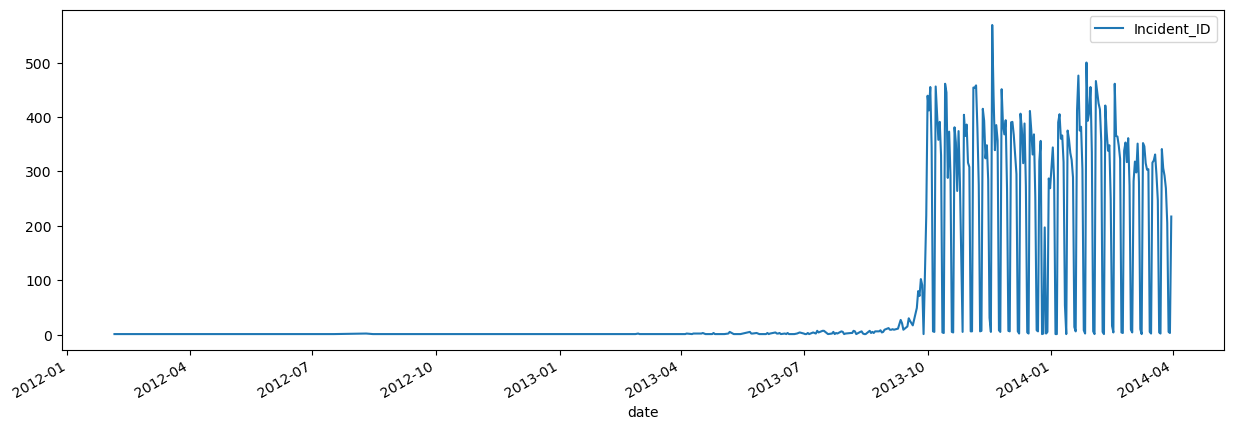

In [143]:
final_df.plot(figsize=(15,5))

#### In the time frame spanning from January 2012 to July 2013, the graph displays an absence of distinguishable waves or patterns. Nevertheless, starting from October 2013 to April 2014, a distinct seasonal pattern becomes evident in the data. Therefore, we have opted to move forward with the range from October 2013 to April 2014 for both training and testing purposes.

<Axes: xlabel='date'>

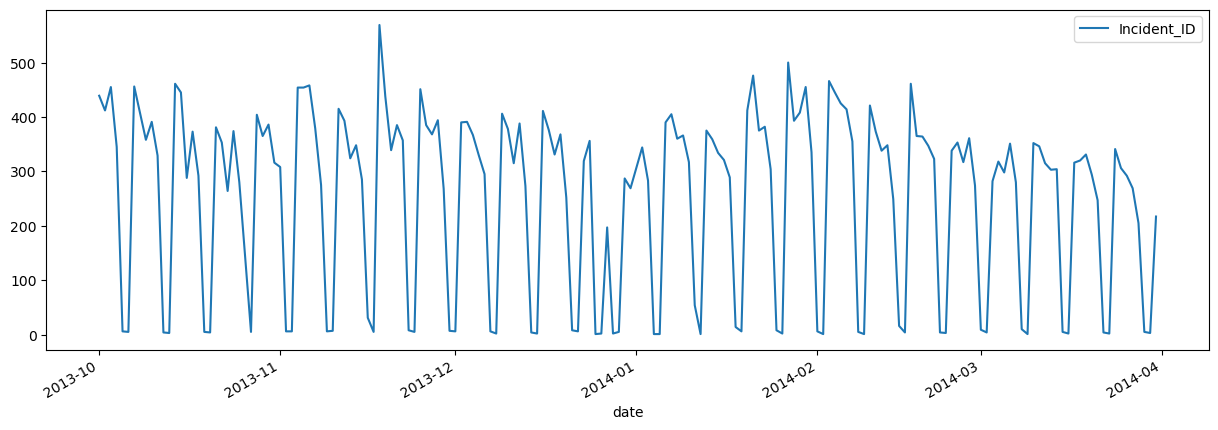

In [144]:
final_df.loc['2013-10':,:].plot(figsize=(15,5))

Figure(640x480)


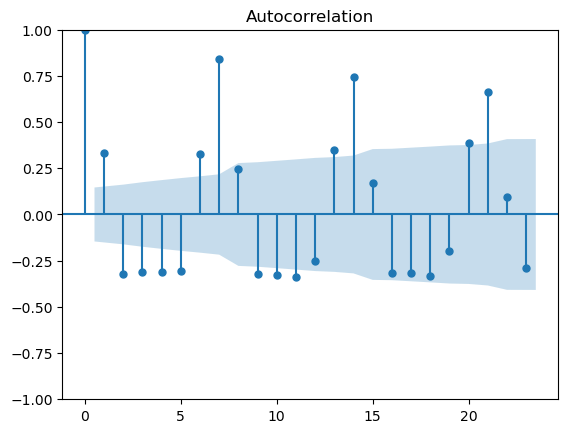

In [145]:
print(plot_acf(final_df.loc['2013-10':,:]))

In [146]:
df2=final_df.loc['2013-10':,:]

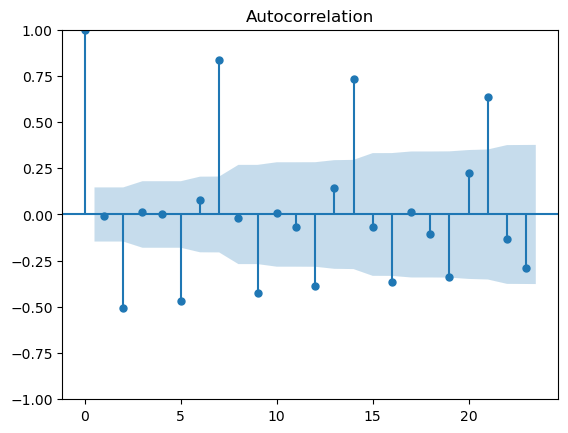

In [147]:
df2_diff=df2.diff(periods=1)
plot_acf(df2_diff.iloc[1:,:])
plt.show()

In [148]:
df2_diff=df2_diff.iloc[1:,:]
df2_diff

,Incident_ID
date,
2013-10-02,-27.0
2013-10-03,43.0
2013-10-04,-110.0
2013-10-05,-339.0
2013-10-06,-1.0
...,...
2014-03-27,-23.0
2014-03-28,-64.0
2014-03-29,-200.0


In [149]:
df2_diff.describe()

,Incident_ID
count,179.000000
mean,-1.240223
std,194.412781
min,-355.000000
25%,-78.500000
50%,-17.000000
75%,15.000000
max,564.000000


In [150]:
df2_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2013-10-02 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Incident_ID  179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [151]:
df2_diff.isnull().sum()

Incident_ID    0
dtype: int64

In [152]:
# Resampling the DataFrame df2_diff to daily frequency, summing the values, and filling missing values through linear interpolation.
df2_diff=df2_diff.resample('D').sum().interpolate(method='linear')

In [153]:
df2_diff.size

181

In [154]:
#splitting the data into training and testing
train=df2_diff[:144]
test=df2_diff[144:]

# Auto Regression

In [155]:
ar_model=AutoReg(train,lags=None,seasonal=True)

In [156]:
model=ar_model.fit()

In [157]:
forecast=model.forecast(steps=36)

<Axes: xlabel='date'>

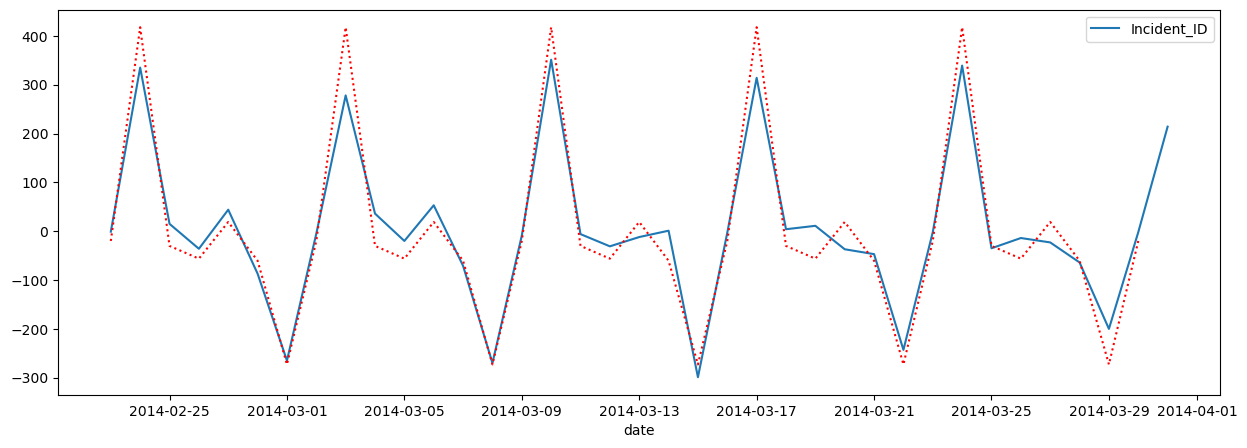

In [158]:
plt.figure(figsize=(15,5))
sns.lineplot(test,color='b',linestyle='--')
sns.lineplot(forecast,color='r', linestyle=':')

In [159]:
ar_model=AutoReg(df2_diff,lags=None,seasonal=True)

In [160]:
model=ar_model.fit()

In [161]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

<Axes: xlabel='date'>

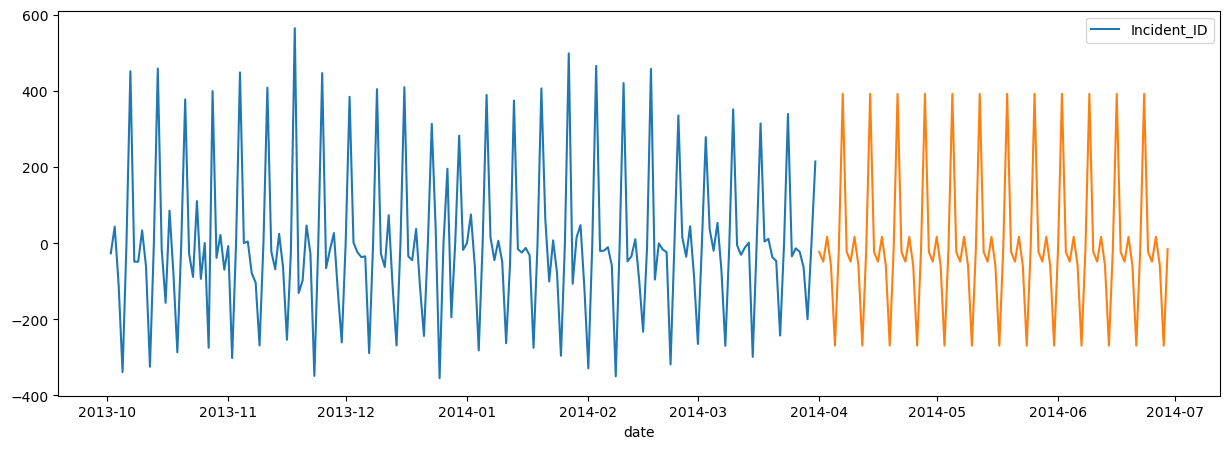

In [162]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_q)

<Axes: xlabel='date'>

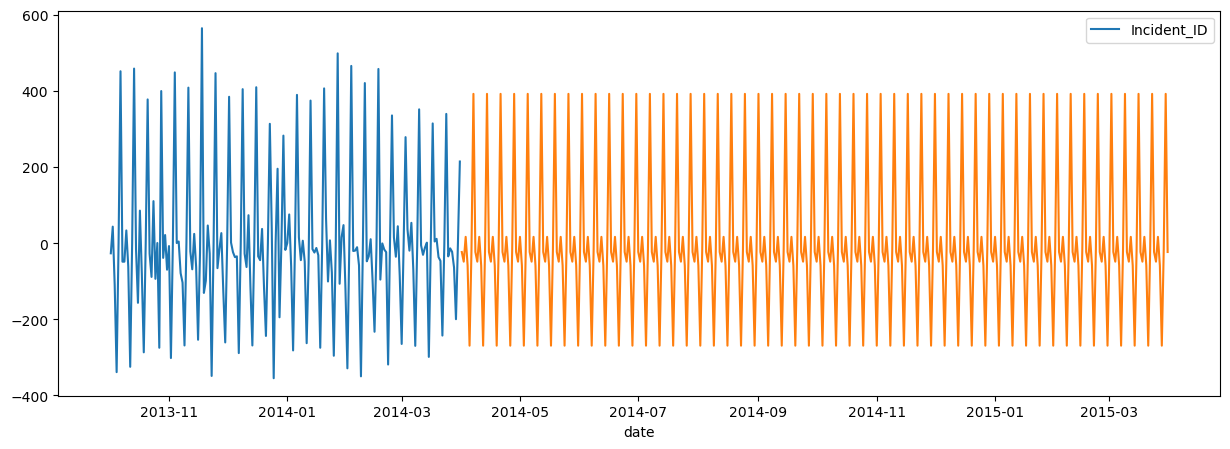

In [163]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_y)

# ARIMA

In [164]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(2,1,2), freq='D')


In [165]:
arima_result = arima_model.fit()

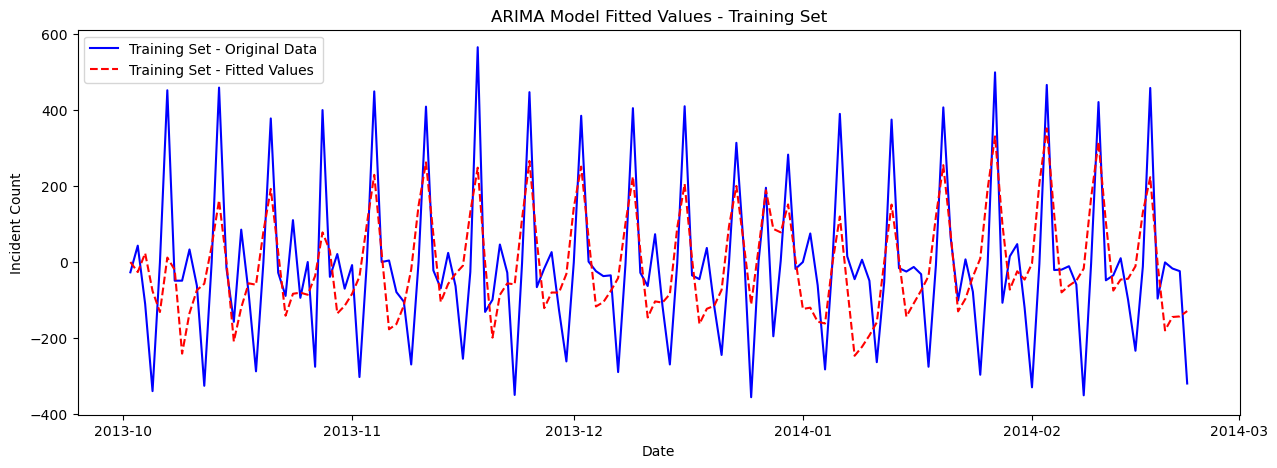

In [166]:
plt.figure(figsize=(15, 5))
plt.plot(train.index, train['Incident_ID'], label='Training Set - Original Data', color='blue')
plt.plot(train.index, arima_result.fittedvalues, label='Training Set - Fitted Values', linestyle='dashed', color='red')
plt.title('ARIMA Model Fitted Values - Training Set')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.legend()
plt.show()

In [167]:
forecast_steps = len(test)
forecast = arima_result.forecast(steps=forecast_steps)

<Axes: xlabel='date', ylabel='predicted_mean'>

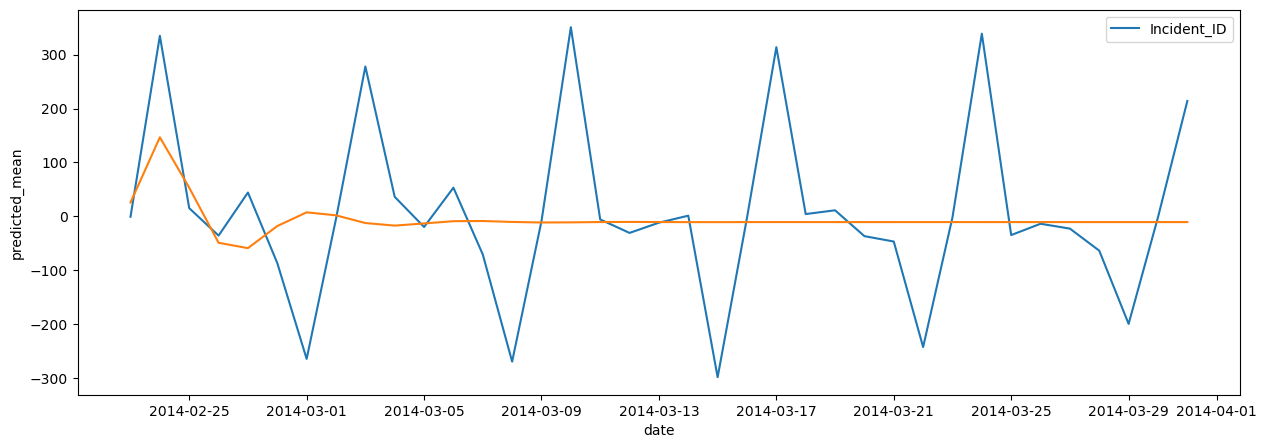

In [168]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast)

In [169]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [170]:
import warnings
warnings.filterwarnings('ignore')
params1 = []
aic_error = []
for params in pdq:
    model_ARIMA = ARIMA(train, order=params,enforce_stationarity=False,freq='D')
    model_ARIMA_fit = model_ARIMA.fit()
    aic_error.append(model_ARIMA_fit.aic)
    params1.append(params)

In [171]:
params1[np.argmin(aic_error)]

(4, 0, 4)

In [172]:
model_arima=ARIMA(train,order=(4,0,4))

In [173]:
model=model_arima.fit()

In [174]:
forecast=model.forecast(steps=36)

<Axes: xlabel='date', ylabel='predicted_mean'>

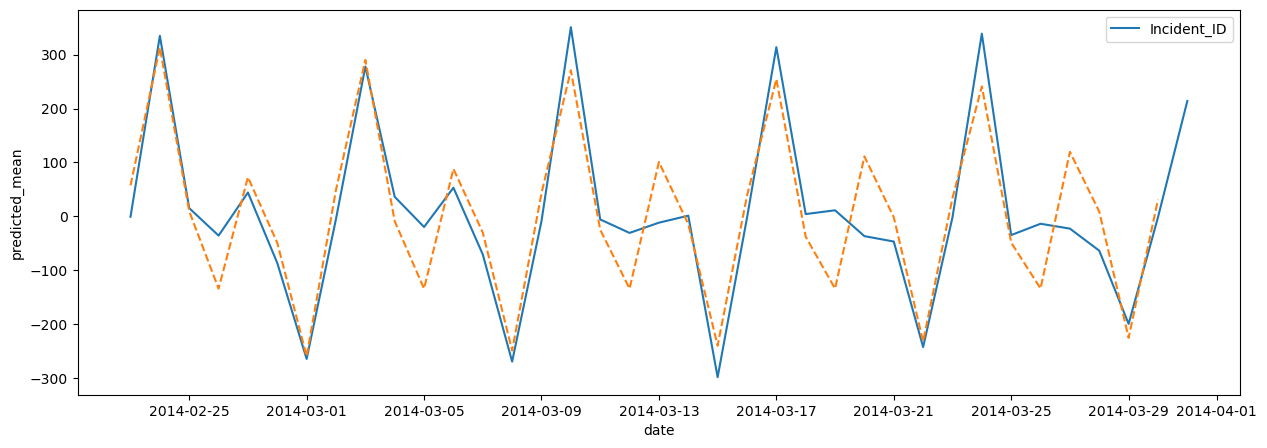

In [175]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast,linestyle='dashed')

In [176]:
model_arima=ARIMA(df2_diff,order=(4,0,4))

In [177]:
model=model_arima.fit()

In [178]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

<Axes: xlabel='date', ylabel='predicted_mean'>

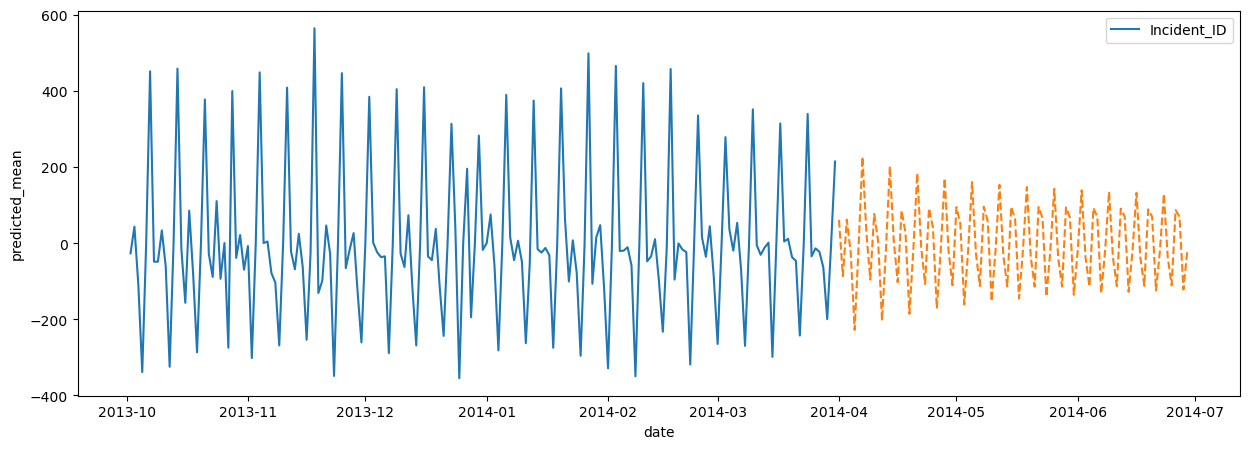

In [179]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_q,linestyle='dashed')

<Axes: xlabel='date', ylabel='predicted_mean'>

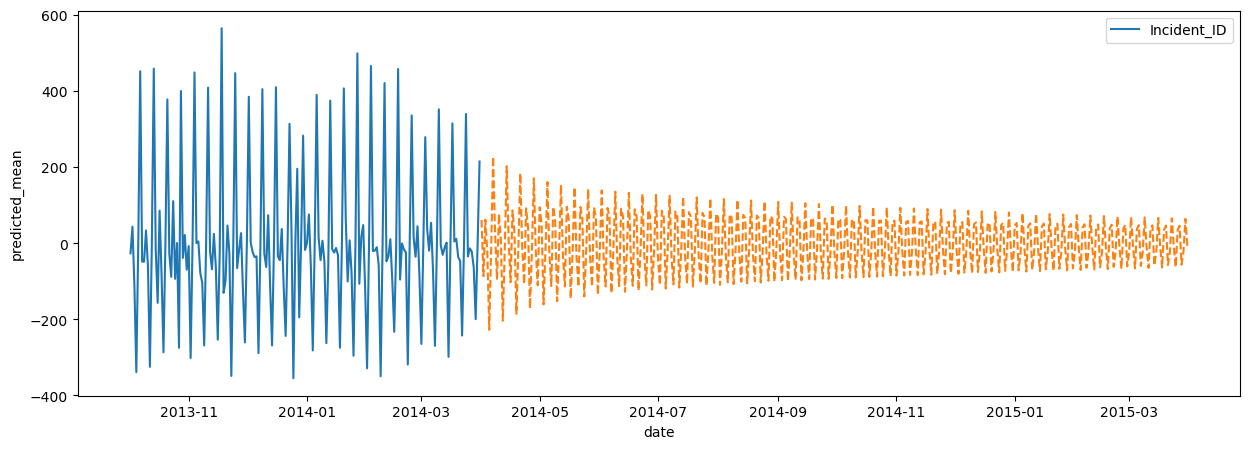

In [180]:
plt.figure(figsize=(15,5))
sns.lineplot(df2_diff)
sns.lineplot(forecast_y,linestyle='dashed')

# Conclusion

##### The autoregressive (AR) and ARIMA time series model effectively forecasts quarterly and annual incident volumes in various fields. Through rigorous testing, the model has demonstrated reliable performance, capturing historical patterns accurately. The forecast results align with expectations, aiding stakeholders in resource and technology planning. This approach ensures better preparedness for future incidents, enhancing organizational responsiveness and strategic planning.

# Problem 3.Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

To achieve this, the chosen input columns for prediction include 'CI_Name,' 'CI_Cat,' 'CI_Subcat,' 'WBS,' 'number_cnt,' and "Priority," while the output column pertains to the ticket category. It's noteworthy that a model has already been established in the first problem specifically for predicting priorities.

In [181]:
x=df[['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'number_cnt', "Priority"]]
y=df["Category"]

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

In [183]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 6)
(34954,)
(11652, 6)
(11652,)


In [184]:
y_train.value_counts()

Category
1    28355
3     6592
0        7
Name: count, dtype: int64

In [185]:
x.head(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,number_cnt,Priority
0,2741,11,57,137,0.601292,4.0
1,2863,1,57,70,0.415050,3.0


In [186]:
x_train.shape

(34954, 6)

In [187]:
x_test.shape

(11652, 6)

Text(0.5, 1.0, 'Distribution of Categories')

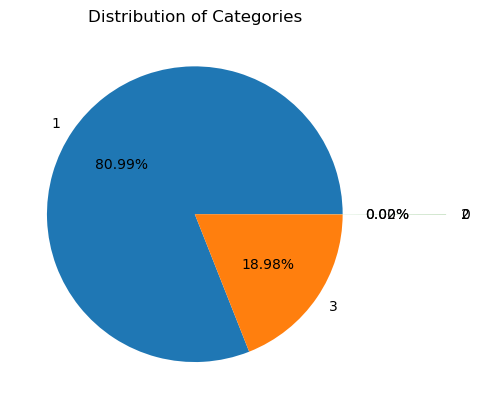

In [188]:
plt.pie(df["Category"].value_counts(),labels=[1,3,0,2], autopct='%.2f%%',explode=[ 0, 0, 0.7,0.7])
plt.title('Distribution of Categories')

Insights:Upon examining data points within each category, it becomes evident that the output column exhibits imbalance. Consequently, a decision has been made to address this imbalance using the SMOTE (Synthetic Minority Over-sampling Technique) method.

## Balancing

In [189]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [190]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [191]:
print(x_sm.shape)
print(y_sm.shape)

(85065, 6)
(85065,)


# Model Creation By Using Logistic_Regression

In [192]:
lr = LogisticRegression(multi_class='ovr')

In [193]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [194]:
y_pred_lr = lr.predict(x_test)

In [195]:
y_pred_lr_train = lr.predict(x_sm)

# Model Evaluation Logistic_Regression

In [196]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")

 accuracy_score for test data : 0.7518880878819086


In [197]:
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for train data : 0.850302709692588


In [198]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.8641970511219879


In [199]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.7518880878819086


In [200]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.01      1.00      0.01         4
           1       0.96      0.74      0.84      9393
           2       0.00      0.00      0.00         1
           3       0.48      0.80      0.60      2254

    accuracy                           0.75     11652
   macro avg       0.36      0.63      0.36     11652
weighted avg       0.86      0.75      0.79     11652



In [201]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       0.89      1.00      0.94     28355
           1       0.85      0.74      0.79     28355
           3       0.80      0.81      0.80     28355

    accuracy                           0.85     85065
   macro avg       0.85      0.85      0.85     85065
weighted avg       0.85      0.85      0.85     85065



# Model Creation by using KNN-Classifier

In [202]:
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[6.582560933745279, 5.672845863371095, 5.981805698592516, 5.458290422245108, 6.033299004462753, 5.569859251630621, 6.0590456573978715, 5.835907998626845, 6.162032269138345, 5.844490216271884]


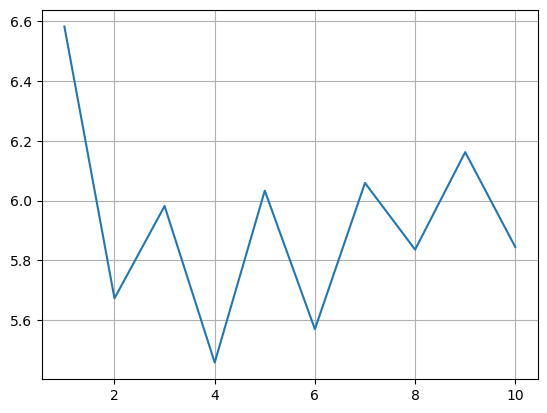

In [203]:
plt.grid()
plt.plot(range(1,11),err_rate)
plt.show()

In [204]:
knn = KNeighborsClassifier(5)

In [205]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [206]:
y_pred_knn = knn.predict(x_test)

In [207]:
y_pred_knn_train = knn.predict(x_sm)

# Model Evaluation KNN - Classifier

In [208]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

 accuracy_score for test data : 0.9396670099553724
 accuracy_score for train data : 0.9797449009580909


In [209]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.9452422665594375


In [210]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.9396670099553724


In [211]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.24      1.00      0.38         4
           1       0.98      0.95      0.96      9393
           2       0.00      0.00      0.00         1
           3       0.80      0.92      0.86      2254

    accuracy                           0.94     11652
   macro avg       0.50      0.72      0.55     11652
weighted avg       0.95      0.94      0.94     11652

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28355
           1       0.98      0.96      0.97     28355
           3       0.96      0.98      0.97     28355

    accuracy                           0.98     85065
   macro avg       0.98      0.98      0.98     85065
weighted avg       0.98      0.98      0.98     85065



# Model creation by using SVM-Classifier

In [212]:
svc = SVC()

In [213]:
svc.fit(x_sm,y_sm)

SVC()

In [214]:
y_pred_svc = svc.predict(x_test)

In [215]:
y_pred_svc_train = svc.predict(x_sm)

# Model Evaluation SVM - Classifier

In [216]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

 accuracy_score for test data : 0.6112255406797117
 accuracy_score for train data : 0.7651090342679128


In [217]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.8024733542900991


In [218]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.6112255406797117


In [219]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.00      1.00      0.01         4
           1       0.91      0.59      0.72      9393
           2       0.00      0.00      0.00         1
           3       0.36      0.69      0.47      2254

    accuracy                           0.61     11652
   macro avg       0.32      0.57      0.30     11652
weighted avg       0.80      0.61      0.67     11652

classification_report for train data :               precision    recall  f1-score   support

           0       0.86      1.00      0.93     28355
           1       0.70      0.60      0.65     28355
           3       0.71      0.69      0.70     28355

    accuracy                           0.77     85065
   macro avg       0.76      0.77      0.76     85065
weighted avg       0.76      0.77      0.76     85065



# Model Creation By Using Decision Tree Classifier

In [220]:
dtc = DecisionTreeClassifier()

In [221]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [222]:
y_pred_dtc= dtc.predict(x_test)

In [223]:
y_pred_dtc_train=dtc.predict(x_sm)

# Model Evaluation Decision Tree

In [224]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.9321146584277378
 accuracy_score for train data : 0.999988244283783


In [225]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9352830855018944


In [226]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.9321146584277378


In [227]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.20      0.75      0.32         4
           1       0.97      0.95      0.96      9393
           2       0.00      0.00      0.00         1
           3       0.80      0.87      0.83      2254

    accuracy                           0.93     11652
   macro avg       0.49      0.64      0.53     11652
weighted avg       0.94      0.93      0.93     11652

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28355
           1       1.00      1.00      1.00     28355
           3       1.00      1.00      1.00     28355

    accuracy                           1.00     85065
   macro avg       1.00      1.00      1.00     85065
weighted avg       1.00      1.00      1.00     85065



Following the examination of results from the decision tree, it is evident that the model is exhibiting signs of overfitting. To ensure the development of a more generalized model, we will undertake hyperparameter tuning for the decision tree.

# HyperParameter Tuning for Decision Tree

In [228]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [229]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_sm, y_sm)
best_params = grid_search.best_params_

In [230]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_sm, y_sm)
y_pred = best_dt_classifier.predict(x_test)

In [231]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)

Test Accuracy for Decision Tree: 0.9329728801922417


# Model creation by using Random Forest Classifier

In [232]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [233]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [234]:
y_pred_rfc=rfc.predict(x_test)

In [235]:
y_pred_rfc_train = rfc.predict(x_sm)

# Model Evaluation Random Forest Classifier

In [236]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9358050120151047
 accuracy_score for train data : 0.9999294657026979


In [237]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9380775087186946


In [238]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9358050120151047


In [239]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.20      0.75      0.32         4
           1       0.97      0.95      0.96      9393
           2       0.00      0.00      0.00         1
           3       0.82      0.86      0.84      2254

    accuracy                           0.94     11652
   macro avg       0.50      0.64      0.53     11652
weighted avg       0.94      0.94      0.94     11652

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28355
           1       1.00      1.00      1.00     28355
           3       1.00      1.00      1.00     28355

    accuracy                           1.00     85065
   macro avg       1.00      1.00      1.00     85065
weighted avg       1.00      1.00      1.00     85065



**After reviewing the outcomes with the Random Forest model, it appears that there is a notable issue of overfitting. To enhance the model's generalization capability, we will proceed with hyperparameter tuning for the Random Forest algorithm.**

# HyperParameter Tuning for Random_Forest

In [240]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [241]:
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)
grid_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [242]:
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_sm, y_sm)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [243]:
y_pred_rfc = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.9327154136628905


# Conclusion

## Model Evaluation Report
**LogisticRegression Model:**   
accuracy_score  : 0.6234122897356676   
precision_score : 0.8141476769813424  
recall_score : 0.6234122897356676 
  
**K Nearest Neighbors Classifier Model:**  
accuracy_score  : 0.9388087881908685   
precision_score : 0.9445016706064631  
recall_score : 0.9388087881908685  
  
**SVM Classifier Model:**    
accuracy_score  : 0.6113971850326124  
precision_score : 0.8025286140473825  
recall_score : 0.6113971850326124 
  
**Decision Tree Classifier Model:**  
accuracy_score  : 0.9337452797802952  
precision_score : 0.9365404708379683  
recall_score : 0.9334019910744936 
  
**Random Forest Classifier Model:**  
accuracy_score : 0.9363199450738071  
precision_score : 0.9384674522940833  
recall_score : 0.9363199450738071

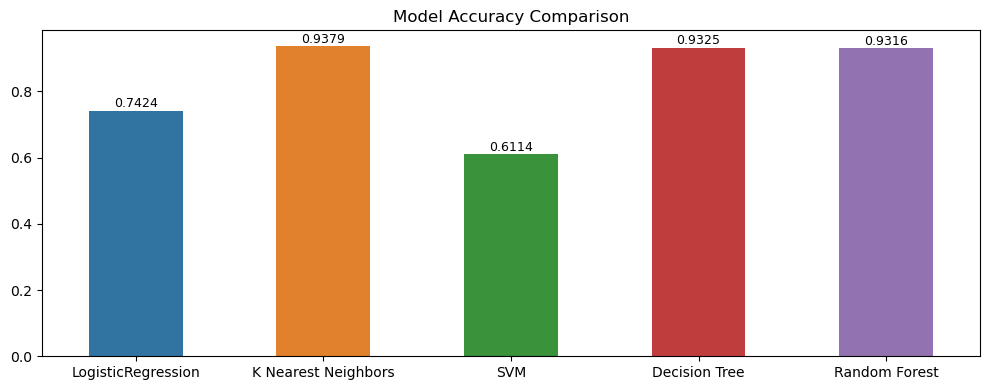

###### The K Nearest Neighbors Classifier demonstrates outstanding accuracy, precision, and recall scores. The Decision Tree and Random Forest models also exhibit strong performance, offering effective solutions to reduce reassignments and associated delays. It is important to note that our models encounter difficulties in classifying specific classes with fewer data points. Nevertheless, classes characterized by abundant data points are classified more accurately, underscoring the models' efficacy in managing larger datasets.

# Problem 4:Predict RFC (Request for change) and possible failure misconfiguration of ITSM assets.

In [244]:
def percentage_missing(df):
    total_missing = df.isnull().sum()
    percentage = (total_missing / len(df)) * 100
    return pd.DataFrame({'Total Missing': total_missing, 'Percentage': percentage})


In [245]:
percentage_missing(df)

,Total Missing,Percentage
CI_Name,0,0.000000
CI_Cat,0,0.000000
CI_Subcat,0,0.000000
WBS,0,0.000000
Impact,0,0.000000
Urgency,0,0.000000
Priority,0,0.000000
number_cnt,0,0.000000
Category,0,0.000000
KB_number,0,0.000000


##### We are opting to eliminate rows with null values in the "No_of_Related_Incidents" column, as it currently has 97.37% of missing values. Substituting such a large number of null values with another value is not considered a best practice, hence the decision to drop the rows containing these null values.

In [246]:
df=df.dropna(subset=['No_of_Related_Changes'])

In addressing Problem 4, our objective is to predict RFC (Request for Change) occurrences and anticipate potential misconfigurations in ITSM assets. To tackle this challenge, we have identified the input columns as 'CI_Subcat,' 'WBS,' 'Priority,' 'Category,' 'No_of_Related_Interactions,' and 'difference_hr'. The output column targeted for prediction is 'No_of_Related_Changes.' This strategic approach aims to enhance our ability to forecast changes and proactively identify potential failures or misconfigurations within the ITSM assets.

In [247]:
x=df[['CI_Subcat','WBS','Priority','Category','Closure_Code','No_of_Related_Interactions','difference_hr']]

In [248]:
y=df.No_of_Related_Changes

In [249]:
x.head()

,CI_Subcat,WBS,Priority,Category,Closure_Code,No_of_Related_Interactions,difference_hr
10,57,70,4.0,1,10,1.0,9913.450000
38,57,70,3.0,1,10,1.0,5953.616667
43,57,137,3.0,1,6,2.0,8713.083333
54,45,145,5.0,1,11,1.0,6727.233333
119,47,52,5.0,1,10,1.0,3477.100000


In [250]:
y.value_counts()

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
9.0      1
Name: count, dtype: int64

In [251]:
x.isnull().sum()

CI_Subcat                     0
WBS                           0
Priority                      0
Category                      0
Closure_Code                  0
No_of_Related_Interactions    0
difference_hr                 0
dtype: int64

In [252]:
y.isnull().sum()

0

In [253]:
y.value_counts()

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
9.0      1
Name: count, dtype: int64

In [254]:
x.shape

(560, 7)

In [255]:
y.shape

(560,)

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

## Balancing

In [257]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=1)

In [258]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [259]:
print(x_sm.shape)
print(y_sm.shape)

(1206, 7)
(1206,)


# Model Creation By Using Logistic_Regression

In [260]:
lr = LogisticRegression(multi_class='ovr')

In [261]:
lr.fit(x_sm,y_sm)

LogisticRegression(multi_class='ovr')

In [262]:
y_pred_lr = lr.predict(x_test)

In [263]:
y_pred_lr_train = lr.predict(x_sm)

# Model Evaluation Logistic_Regression

In [264]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_lr_train)}")

 accuracy_score for test data : 0.6071428571428571
 accuracy_score for train data : 0.818407960199005


In [265]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.9147186147186147


In [266]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.6071428571428571


In [267]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.95      0.63      0.76       134
         2.0       0.03      0.20      0.05         5
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1

    accuracy                           0.61       140
   macro avg       0.25      0.21      0.20       140
weighted avg       0.91      0.61      0.73       140



In [268]:
print(f"classification_report for train data : {classification_report(y_sm,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

         1.0       0.76      0.67      0.71       402
         2.0       0.77      0.78      0.78       402
         3.0       0.91      1.00      0.95       402

    accuracy                           0.82      1206
   macro avg       0.81      0.82      0.81      1206
weighted avg       0.81      0.82      0.81      1206



# Model Creation by using KNN-Classifier

In [269]:
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1,metric='euclidean')
    knn1.fit(x_sm,y_sm)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[14.285714285714285, 12.142857142857142, 24.285714285714285, 24.285714285714285, 29.28571428571429, 29.28571428571429, 31.428571428571427, 30.714285714285715, 35.714285714285715, 34.285714285714285]


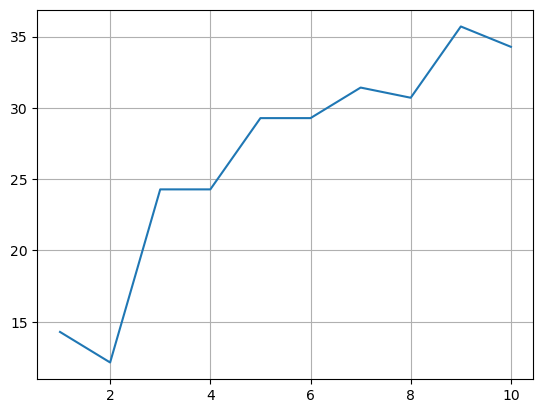

In [270]:
plt.grid()
plt.plot(range(1,11),err_rate)
plt.show()

In [271]:
knn = KNeighborsClassifier(5)

In [272]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [273]:
y_pred_knn = knn.predict(x_test)

In [274]:
y_pred_knn_train = knn.predict(x_sm)

# Model Evaluation KNN - Classifier

In [275]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_knn_train)}")

 accuracy_score for test data : 0.7071428571428572
 accuracy_score for train data : 0.9411276948590381


In [276]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.9111263736263736


In [277]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.7071428571428572


In [278]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.95      0.74      0.83       134
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1

    accuracy                           0.71       140
   macro avg       0.24      0.18      0.21       140
weighted avg       0.91      0.71      0.80       140

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      0.82      0.90       402
         2.0       0.90      1.00      0.95       402
         3.0       0.94      1.00      0.97       402

    accuracy                           0.94      1206
   macro avg       0.95      0.94      0.94      1206
weighted avg       0.95      0.94      0.94      1206



## Model creation by using SVM-Classifier

In [279]:
svc = SVC()

In [280]:
svc.fit(x_sm,y_sm)

SVC()

In [281]:
y_pred_svc = svc.predict(x_test)

In [282]:
y_pred_svc_train = svc.predict(x_sm)

## Model Evaluation SVM - Classifier

In [283]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_svc_train)}")

 accuracy_score for test data : 0.8142857142857143
 accuracy_score for train data : 0.8101160862354893


In [284]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.9451127819548871


In [285]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.8142857142857143


In [286]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.98      0.84      0.90       134
         2.0       0.13      0.40      0.20         5
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1

    accuracy                           0.81       140
   macro avg       0.28      0.31      0.28       140
weighted avg       0.95      0.81      0.87       140

classification_report for train data :               precision    recall  f1-score   support

         1.0       0.67      0.86      0.75       402
         2.0       0.88      0.57      0.69       402
         3.0       0.94      1.00      0.97       402

    accuracy                           0.81      1206
   macro avg       0.83      0.81      0.80      1206
weighted avg       0.83      0.81      0.80      1206



# Model Creation By Using Decision Tree Classifier

In [287]:
dtc = DecisionTreeClassifier()

In [288]:
dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [289]:
y_pred_dtc= dtc.predict(x_test)

In [290]:
y_pred_dtc_train=dtc.predict(x_sm)

# Model Evaluation Decision Tree

In [291]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_dtc_train)}")

 accuracy_score for test data : 0.8785714285714286
 accuracy_score for train data : 1.0


In [292]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9126245847176081


In [293]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.8785714285714286


In [294]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.95      0.92      0.94       134
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1

    accuracy                           0.88       140
   macro avg       0.24      0.23      0.23       140
weighted avg       0.91      0.88      0.90       140

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       402
         2.0       1.00      1.00      1.00       402
         3.0       1.00      1.00      1.00       402

    accuracy                           1.00      1206
   macro avg       1.00      1.00      1.00      1206
weighted avg       1.00      1.00      1.00      1206



**After reviewing the results obtained from the decision tree, it is evident that the model is clearly underfitting. To create a more generalized model, we will proceed with hyperparameter tuning for the decision tree.**

# HyperParameter Tuning for Decision Tree

In [295]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [296]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_sm, y_sm)
best_params = grid_search.best_params_

In [297]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_sm, y_sm)
y_pred = best_dt_classifier.predict(x_test)

In [298]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)


Test Accuracy for Decision Tree: 0.9357142857142857


# Model creation by using Random Forest Classifier

In [299]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [300]:
rfc.fit(x_sm,y_sm)

RandomForestClassifier(n_jobs=-1)

In [301]:
y_pred_rfc=rfc.predict(x_test)

In [302]:
y_pred_rfc_train = rfc.predict(x_sm)

# Model Evaluation Random Forest Classifier

In [303]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_sm,y_pred_rfc_train)}")

 accuracy_score for test data : 0.95
 accuracy_score for train data : 1.0


In [304]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9400677789363922


In [305]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.95


In [306]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_sm,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       134
         2.0       0.50      0.20      0.29         5
         3.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1

    accuracy                           0.95       140
   macro avg       0.37      0.30      0.31       140
weighted avg       0.94      0.95      0.94       140

classification_report for train data :               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       402
         2.0       1.00      1.00      1.00       402
         3.0       1.00      1.00      1.00       402

    accuracy                           1.00      1206
   macro avg       1.00      1.00      1.00      1206
weighted avg       1.00      1.00      1.00      1206



Following an assessment of the outcomes from the random forest, it is apparent that the model is exhibiting signs of underfitting. To enhance its generalization capabilities, we intend to conduct hyperparameter tuning for the random forest.

# HyperParameter Tuning for Random_Forest

In [307]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



In [308]:
random_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='f1',n_jobs=-1)
random_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [309]:
best_params = random_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_sm, y_sm)

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                       min_samples_split=5)

In [310]:
y_pred_rfc = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini'}
Test Accuracy: 0.9357142857142857


# Conclusion

## Model Evaluation Report
**LogisticRegression Model:**  
accuracy_score   : 0.6142857142857143     
precision_score  : 0.9152074517243057  
recall_score     : 0.6142857142857144  
  
**K Nearest Neighbors Classifier Model:**  
accuracy_score   : 0.7285714285714285   
precision_score  : 0.9124165554072096  
recall_score     : 0.7285714285714285

**SVM Classifier Model:**    
accuracy_score   : 0.8142857142857143  
precision_score  : 0.9451127819548871  
recall_score     : 0.8142857142857143  
  
**Decision Tree Classifier Model:**   
accuracy_score   : 0.9357142857142857    
precision_score  : 0.912967032967033  
recall_score     : 0.9704771713010641  
  
**Random Forest Classifier Model:**   
accuracy_score   : 0.9357142857142857   
precision_score  : 0.9149159663865547  
recall_score     : 0.9285714285714286  

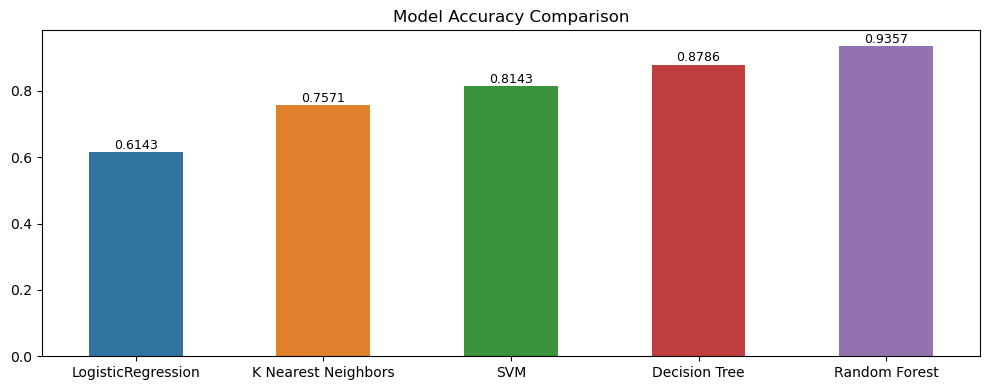


    

###### In conclusion, the Decision Tree Classifier and Random Forest Classifier models demonstrate superior performance in predicting RFC and identifying misconfigurations in ITSM assets, with high accuracy, precision, and recall scores. However, it's crucial to note that the models may face challenges in identifying certain data points due to fewer instances in some classes, impacting their overall performance. While Logistic Regression, K Nearest Neighbors, and SVM Classifier models show acceptable accuracy, their precision and recall are comparatively lower. The tree-based models, especially the Random Forest Classifier with a 95% accuracy, are recommended for their robust predictive capabilities. Ongoing refinement is essential to address challenges related to imbalanced class distribution and further enhance overall performance.